
<font color = 'grey' >
<font size = 20 >
EDA and Analysis of HF_df4


In [ ]:
! pip install pywaffle 

     |████████████████████████████████| 532kB 4.5MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Reading DataSet

In [ ]:
import pandas as pd 
info_df = pd.read_csv('/content/drive/MyDrive/ahlam_som_em/HF_df4 v2.csv')

In [ ]:
info_df

,Gender,MCPain,palpitation,Syncope,sob,Dizziness,Loss of Consciousness,PAPain,Angina,PND,Orthopnea,NYHA Class,Arrhythmia,CHF,CABG,Optimal Medication treatment/Aggressive Risk Factors,PCI,PMH Diabetes,PMH Hypertension,PMH Dyslipidemia,COPD,Renal Impairment (Creatinine > 180 umol/L),PVD,CVA History,CVAType,Premature CAD Age < 55,Family History Hypertention,Sudden Cardiac Death,Family History Dyslipidemia,Family History DM,Morbid Obesity BMI 40,Smoking Detailed History,Alcoholic Beverages Detailed History,Physical Activity,Smoker,FH of Premature CAD age < 55yrs,Metabolic syndrome,Sleep Apnea,JVP,Rhythm,...,2013,2014,2015,2016,2017,2018,2019,2020,Lab_Result_2_BUN,Lab_Result_2_Na,Lab_Result_2_K,Lab_Result_2_Crea,Lab_Result_2_HgbA1C,Lab_Result_2_BNP,Lab_Result_2_EF,Lab_Result_2_CreCl,Lab_Result_2_BCR_ratio,Lab_Result_2_SBP,Lab_Result_2_DBP,Age_1,Weight_1,Height_1,BSA(m2)_1,BMI_1,Heart Rate_1,SBP Left mm Hg_1,DBP Left mm Hg_1,Pulse Pressure Left mm Hg_1,Lab Result (Crea)_1,Creatinine Clearance_1,EF%_1,Lab Result (BUN)_1,Lab Result (NA)_1,Lab Result (k)_1,Lab Result (HgbA1C)_1,Lab Result (Hgb)_1,Lab Result (BNP)_1,BP_rate_1,non-SI ratio BCR_1,age_group
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,3,0,0,1,0,0,2,...,0,1,6,3,3,4,3,4,2,1,1,1,0,0,1,0,0,1,0,4,3,2,2,4,9,7,3,8,4,5,4,7,4,7,9,3,3,8,8,2
1,0,0,0,0,1,0,0,0,0,0,0,3,0,1,0,1.0,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,2,...,0,2,0,0,0,0,0,0,2,1,2,1,0,0,2,2,0,0,0,5,9,2,9,9,5,2,1,5,6,7,2,7,2,9,4,0,2,7,6,2
2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,1,2,...,3,3,3,4,1,5,2,3,1,1,1,1,0,0,2,1,0,0,0,2,4,0,2,7,6,2,4,2,2,4,2,3,6,5,1,3,0,2,6,2
3,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1.0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,2,...,3,3,2,1,0,0,0,0,2,1,1,1,0,0,0,1,0,2,0,8,5,5,3,5,1,8,3,9,5,4,5,8,6,7,9,6,1,9,9,3
4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,1,0,1,2,...,5,4,3,4,3,9,0,0,1,1,1,1,0,0,2,0,0,0,0,7,4,9,7,0,1,5,6,4,5,3,0,4,4,5,3,6,1,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1.0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,2,0,3,0,0,1,0,0,2,...,2,4,3,6,3,0,0,0,1,0,1,1,0,0,2,1,0,0,0,4,7,5,7,6,9,1,6,0,4,7,2,1,1,8,8,5,3,0,1,2
195,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,2,...,4,3,3,1,3,3,3,1,1,1,1,1,0,1,1,2,0,0,0,2,8,2,7,9,0,0,5,0,4,7,5,2,4,7,2,6,7,0,2,2
196,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,2,0,0,1,0,1,2,...,2,3,2,3,3,3,4,2,1,1,1,1,0,0,2,2,0,0,0,2,1,0,0,7,1,2,1,4,0,7,0,0,9,1,2,4,1,6,3,2
197,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,0,0,1,2,...,0,2,3,3,3,3,3,4,1,1,1,1,0,1,2,0,0,0,0,1,3,7,4,2,0,1,4,1,4,6,0,4,2,4,1,7,6,1,5,2


## Gather General Info 

In [ ]:
info_df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 118 columns):
 #   Column                                                Dtype  
---  ------                                                -----  
 0   Gender                                                int64  
 1   MCPain                                                int64  
 2   palpitation                                           int64  
 3   Syncope                                               int64  
 4   sob                                                   int64  
 5   Dizziness                                             int64  
 6   Loss of Consciousness                                 int64  
 7   PAPain                                                int64  
 8   Angina                                                int64  
 9   PND                                                   int64  
 10  Orthopnea                                             int64  
 11  NYHA Class        

## Check For Missing Values in rows and columns

In [ ]:
info_df.isna().sum().sum()

0

In [ ]:
info_df.isna().sum(axis=1).sum()

0

<font size = 4>
Note : <br>
As Seen this Dataset has 118 Column which is very hard to work with one by one so a technique that can be used is to first Get the number of values contained each column and divide features by that to binary (having 2 values only usually 0-1) and Non Binary Features which can be grouped together by number of values they have 

# Classifiying Columns (Features) 
by number of Values they Have

In [ ]:
'''
For Each Feature Get the unique Values it have 
'''
values_df = pd.DataFrame((info_df.apply(lambda col: col.unique())),columns=['Values'])

In [ ]:
values_df

,Values
Gender,"[1, 0]"
MCPain,"[0, 1]"
palpitation,"[0, 1]"
Syncope,[0]
sob,"[0, 1]"
...,...
Lab Result (Hgb)_1,"[3, 0, 6, 1, 7, 9, 5, 2, 4, 8]"
Lab Result (BNP)_1,"[3, 2, 0, 1, 7, 5, 4, 8, 9, 6]"
BP_rate_1,"[8, 7, 2, 9, 3, 6, 0, 5, 4, 1]"
non-SI ratio BCR_1,"[8, 6, 9, 4, 0, 7, 3, 1, 2, 5]"


In [ ]:
'''
For Each Feature Get the number of unique Values it have 
'''
values_df['No of Values'] =values_df.T.apply(lambda col: col.values[0].shape[0])

In [ ]:
values_df.T

,Gender,MCPain,palpitation,Syncope,sob,Dizziness,Loss of Consciousness,PAPain,Angina,PND,Orthopnea,NYHA Class,Arrhythmia,CHF,CABG,Optimal Medication treatment/Aggressive Risk Factors,PCI,PMH Diabetes,PMH Hypertension,PMH Dyslipidemia,COPD,Renal Impairment (Creatinine > 180 umol/L),PVD,CVA History,CVAType,Premature CAD Age < 55,Family History Hypertention,Sudden Cardiac Death,Family History Dyslipidemia,Family History DM,Morbid Obesity BMI 40,Smoking Detailed History,Alcoholic Beverages Detailed History,Physical Activity,Smoker,FH of Premature CAD age < 55yrs,Metabolic syndrome,Sleep Apnea,JVP,Rhythm,...,2013,2014,2015,2016,2017,2018,2019,2020,Lab_Result_2_BUN,Lab_Result_2_Na,Lab_Result_2_K,Lab_Result_2_Crea,Lab_Result_2_HgbA1C,Lab_Result_2_BNP,Lab_Result_2_EF,Lab_Result_2_CreCl,Lab_Result_2_BCR_ratio,Lab_Result_2_SBP,Lab_Result_2_DBP,Age_1,Weight_1,Height_1,BSA(m2)_1,BMI_1,Heart Rate_1,SBP Left mm Hg_1,DBP Left mm Hg_1,Pulse Pressure Left mm Hg_1,Lab Result (Crea)_1,Creatinine Clearance_1,EF%_1,Lab Result (BUN)_1,Lab Result (NA)_1,Lab Result (k)_1,Lab Result (HgbA1C)_1,Lab Result (Hgb)_1,Lab Result (BNP)_1,BP_rate_1,non-SI ratio BCR_1,age_group
Values,"[1, 0]","[0, 1]","[0, 1]",[0],"[0, 1]","[0, 1]",[0],[0],"[0, 1]","[0, 1]","[0, 1]","[1, 3, 2, 0]","[0, 1]","[1, 0]","[0, 1]","[1.0, 0.0, 0.5]","[1, 0]","[1, 0]","[1, 0]","[1, 0]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[1, 0, 2]","[0, 1]","[0, 1]",[0],"[0, 1]","[0, 1]","[0, 1]","[0, 1, 2]","[0, 1]","[3, 1, 2, 0]","[0, 1]","[0, 1]","[1, 0]",[0],"[0, 1, 2]","[2, 4, 0, 1]",...,"[0, 3, 5, 4, 2, 6, 1, 7]","[1, 2, 3, 4, 0, 6, 5, 8]","[6, 0, 3, 2, 5, 7, 1, 4, 8, 9]","[3, 0, 4, 1, 2, 5, 11, 7, 8, 6]","[3, 0, 1, 2, 5, 7, 4, 6, 10, 13, 8]","[4, 0, 5, 9, 2, 15, 3, 8, 1, 7, 6]","[3, 0, 2, 7, 5, 4, 8, 1, 6, 9]","[4, 0, 3, 5, 2, 7, 1, 8, 6]","[2, 1, 0]","[1, 0]","[1, 2, 0]","[1, 2, 0]","[0, 2]","[0, 1, 2]","[1, 2, 0]","[0, 2, 1]",[0],"[1, 0, 2, 3]","[0, 1, 2, 3]","[4, 5, 2, 8, 7, 3, 6, 9, 1, 0]","[3, 9, 4, 5, 8, 6, 2, 0, 1, 7]","[2, 0, 5, 9, 8, 4, 6, 1, 7, 3]","[2, 9, 3, 7, 6, 4, 1, 0, 8, 5]","[4, 9, 7, 5, 0, 6, 8, 2, 3, 1]","[9, 5, 6, 1, 2, 3, 0, 4, 7, 8]","[7, 2, 8, 5, 6, 1, 9, 0, 3, 4]","[3, 1, 4, 6, 7, 2, 0, 8, 5, 9]","[8, 5, 2, 9, 4, 7, 1, 0, 6, 3]","[4, 6, 2, 5, 3, 0, 9, 8, 7, 1]","[5, 7, 4, 3, 8, 1, 2, 6, 0, 9]","[4, 2, 5, 0, 3, 1]","[7, 3, 8, 4, 0, 9, 1, 2, 5, 6]","[4, 2, 6, 7, 8, 0, 1, 3, 9]","[7, 9, 5, 3, 2, 1, 4, 0, 6, 8]","[9, 4, 1, 3, 5, 7, 6, 8, 2, 0]","[3, 0, 6, 1, 7, 9, 5, 2, 4, 8]","[3, 2, 0, 1, 7, 5, 4, 8, 9, 6]","[8, 7, 2, 9, 3, 6, 0, 5, 4, 1]","[8, 6, 9, 4, 0, 7, 3, 1, 2, 5]","[2, 3, 1]"
No of Values,2,2,2,1,2,2,1,1,2,2,2,4,2,2,2,3,2,2,2,2,2,2,2,2,3,2,2,1,2,2,2,3,2,4,2,2,2,1,3,4,...,8,8,10,10,11,11,10,9,3,2,3,3,2,3,3,3,1,4,4,10,10,10,10,10,10,10,10,10,10,10,6,10,9,10,10,10,10,10,10,3


In [ ]:
'''
For Each Feature check if it is binary or not 
Binary --> Have only two features mostly zero or 1
'''
values_df['Is_binary'] = values_df['No of Values'].apply(lambda no_of_num : no_of_num == 2 ) 

In [ ]:
values_df

,Values,No of Values,Is_binary
Gender,"[1, 0]",2,True
MCPain,"[0, 1]",2,True
palpitation,"[0, 1]",2,True
Syncope,[0],1,False
sob,"[0, 1]",2,True
...,...,...,...
Lab Result (Hgb)_1,"[3, 0, 6, 1, 7, 9, 5, 2, 4, 8]",10,False
Lab Result (BNP)_1,"[3, 2, 0, 1, 7, 5, 4, 8, 9, 6]",10,False
BP_rate_1,"[8, 7, 2, 9, 3, 6, 0, 5, 4, 1]",10,False
non-SI ratio BCR_1,"[8, 6, 9, 4, 0, 7, 3, 1, 2, 5]",10,False


In [ ]:
'''
Get Number of Binary Features 
'''
values_df.Is_binary.sum()

55

In [ ]:
pd.DataFrame({'Binary' : [55] ,
              'Non Binary' : [118-55]} , index = ['Number of Features'])

,Binary,Non Binary
Number of Features,55,63


<font size = 5>Binary Features

In [ ]:
pd.DataFrame(values_df[values_df.Is_binary==True].index[:],columns = ['Binary Feature Name'])

,Binary Feature Name
0,Gender
1,MCPain
2,palpitation
3,sob
4,Dizziness
5,Angina
6,PND
7,Orthopnea
8,Arrhythmia
9,CHF


# Binary Features Analysis 


<font size = 5> 
To make it easier to read and nivigate I am going to group each 3 features together in one cell 

## Analysis of 
##0  -                                       Gender <br>
##1  -                                      MCPain <br>
##2  -                                palpitation <br>

0 3 Index(['Gender', 'MCPain', 'palpitation'], dtype='object')


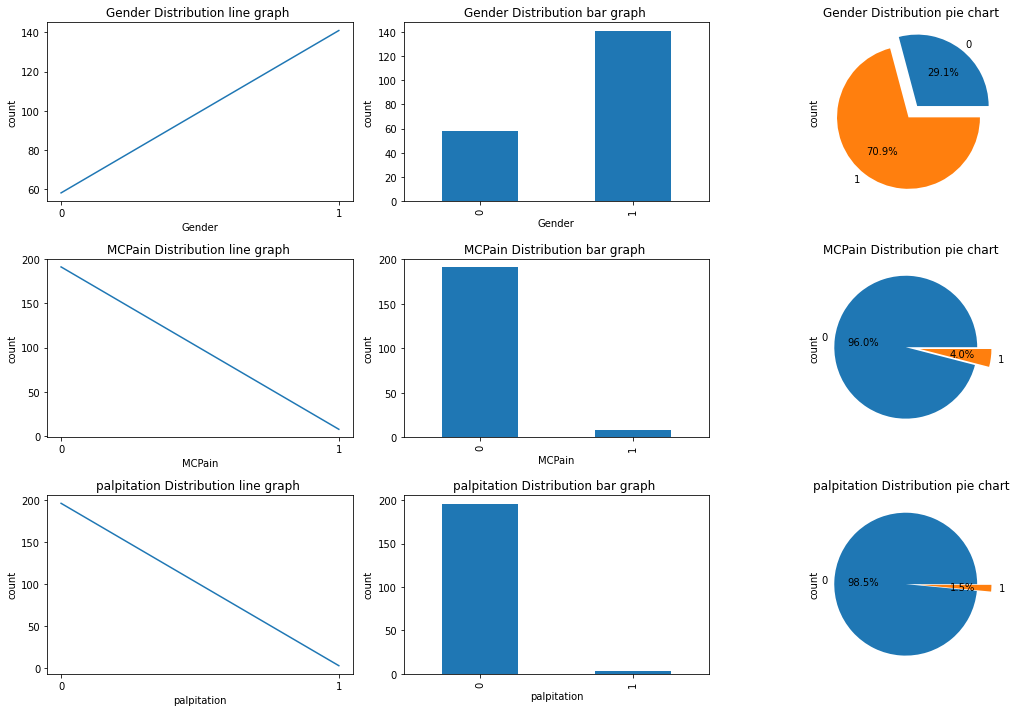

In [ ]:
START = 0
END = 3

print(START , END, values_df[values_df.Is_binary==True].index[START:END])
fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3


## Analysis of
##3                                          sob
##4                                    Dizziness
##5                                       Angina


3 6 Index(['sob', 'Dizziness', 'Angina'], dtype='object')


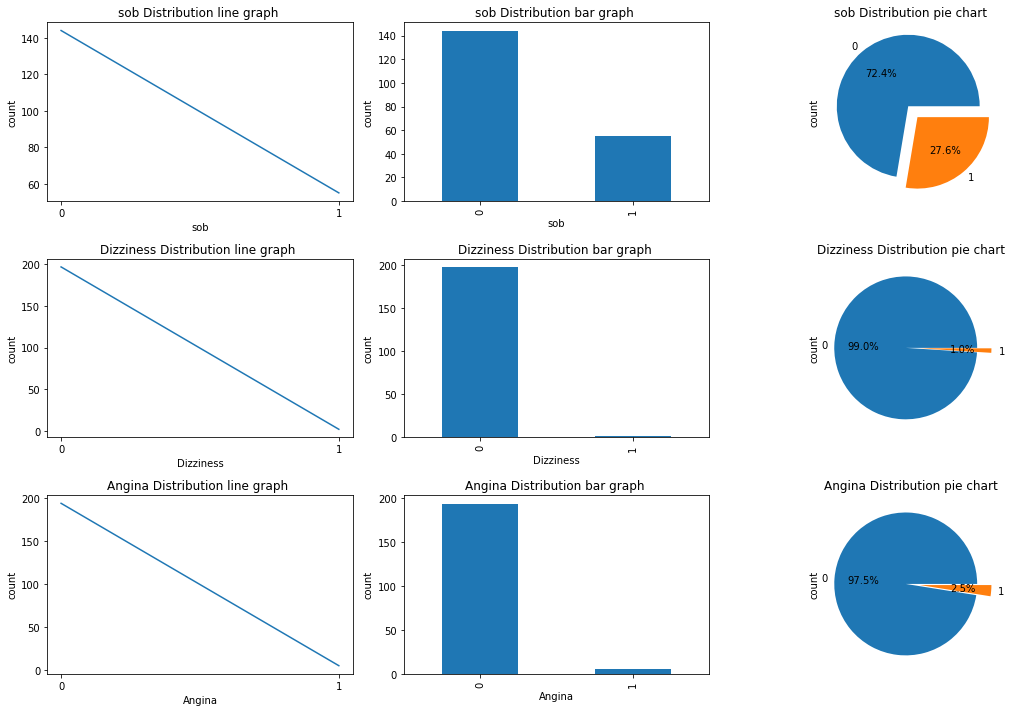

In [ ]:
print(START , END,values_df[values_df.Is_binary==True].index[START:END])

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##6                                          PND
##7                                    Orthopnea
##8                                   Arrhythmia


6 9


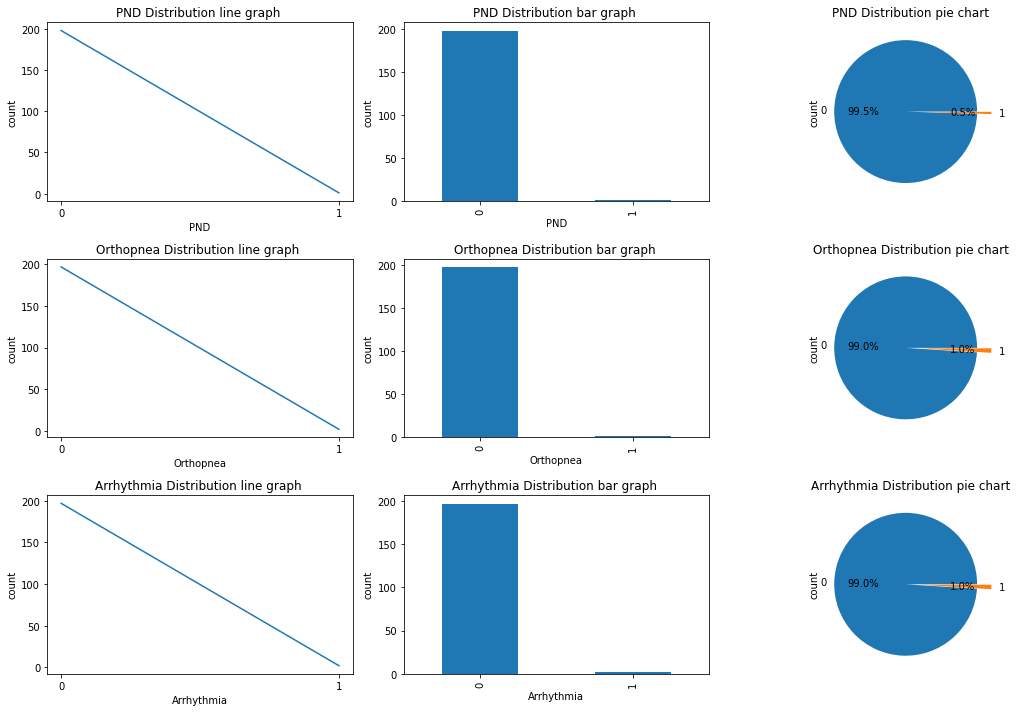

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3


## Analysis of
##9                                          CHF
##10                                        CABG
##11                                         PCI


9 12


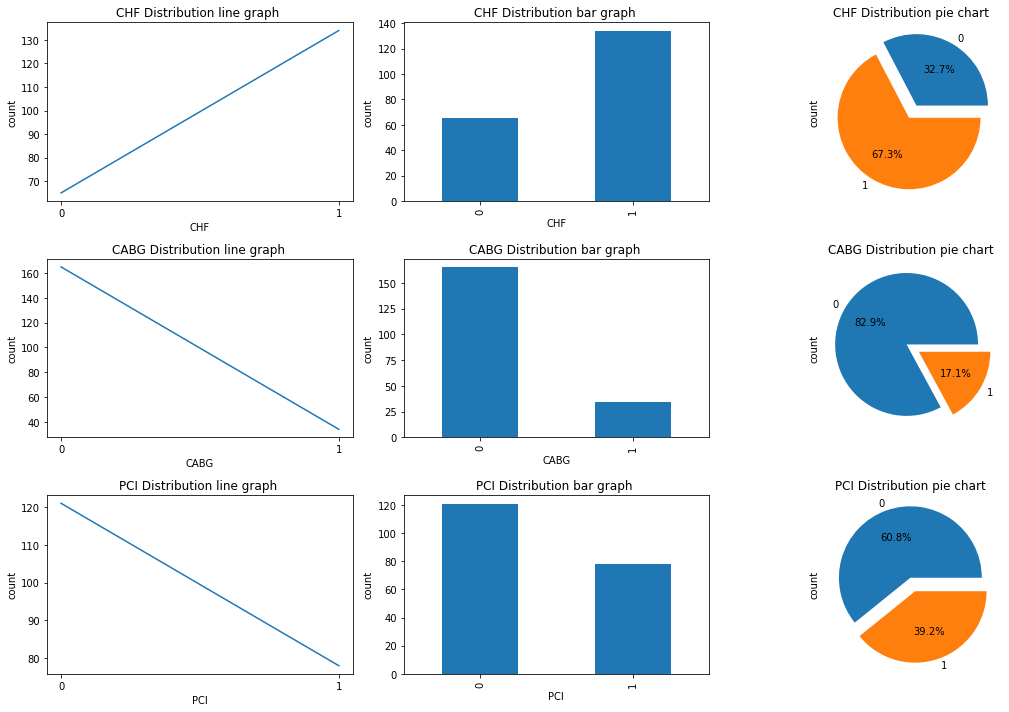

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3


## Analysis of
##12                                PMH Diabetes
##13                            PMH Hypertension
##14                            PMH Dyslipidemia


12 15


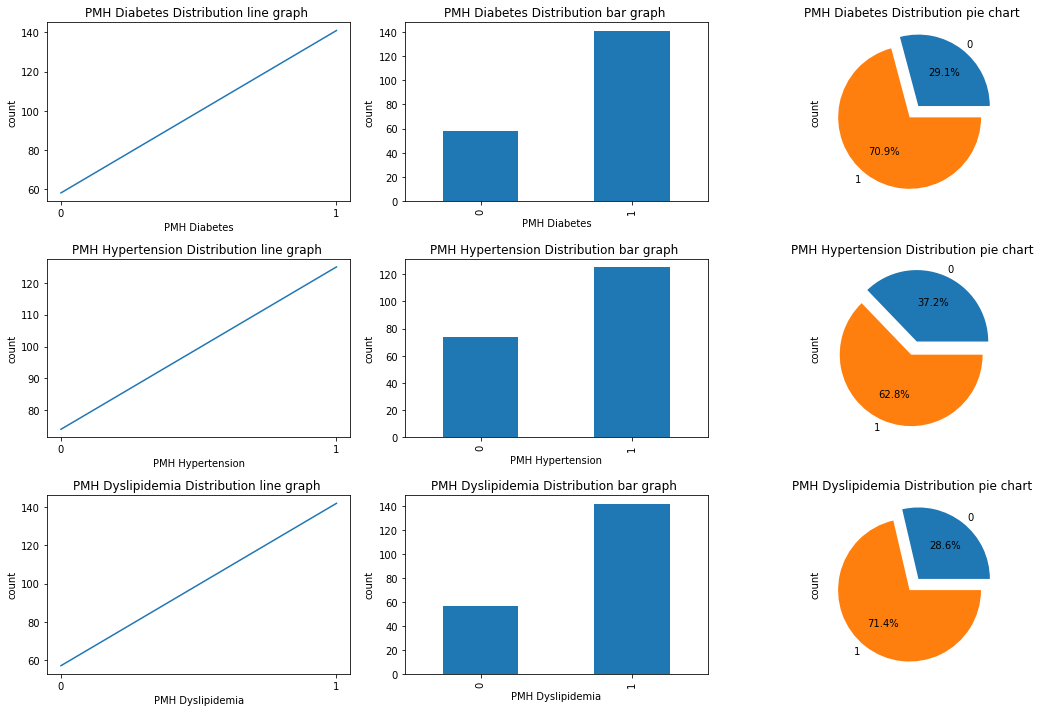

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##15                                        COPD
##16  Renal Impairment (Creatinine > 180 umol/L)
##17                                         PVD


15 18


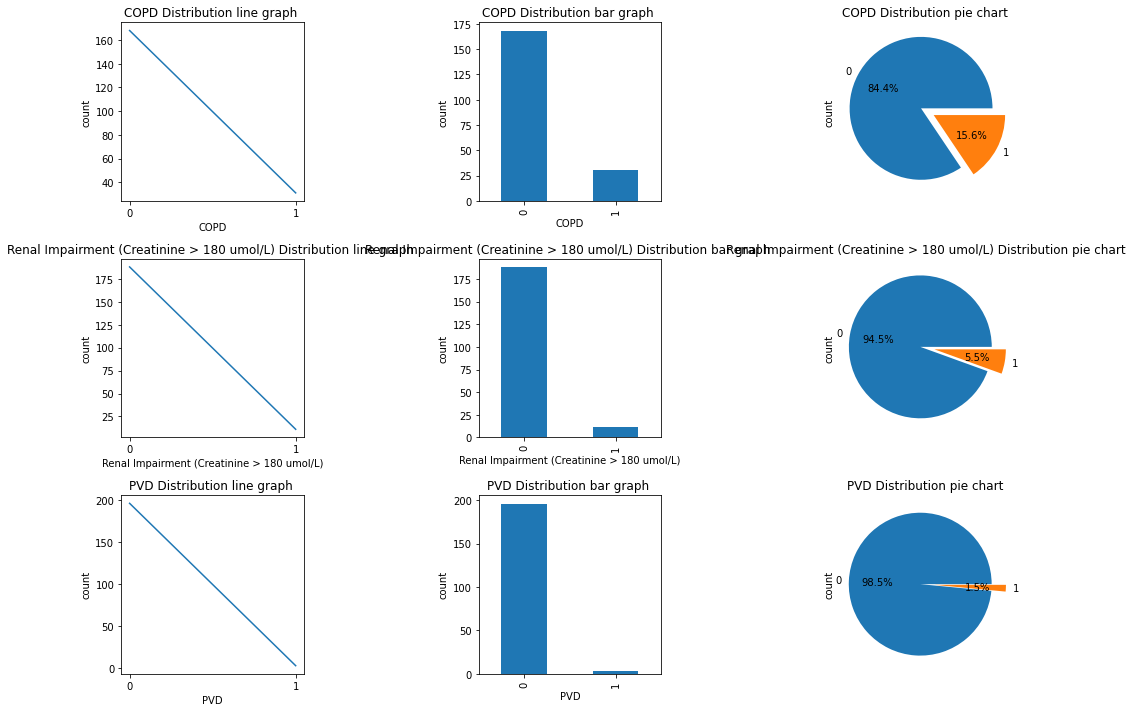

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##18                                 CVA History
##19                      Premature CAD Age < 55
##20                 Family History Hypertention


18 21


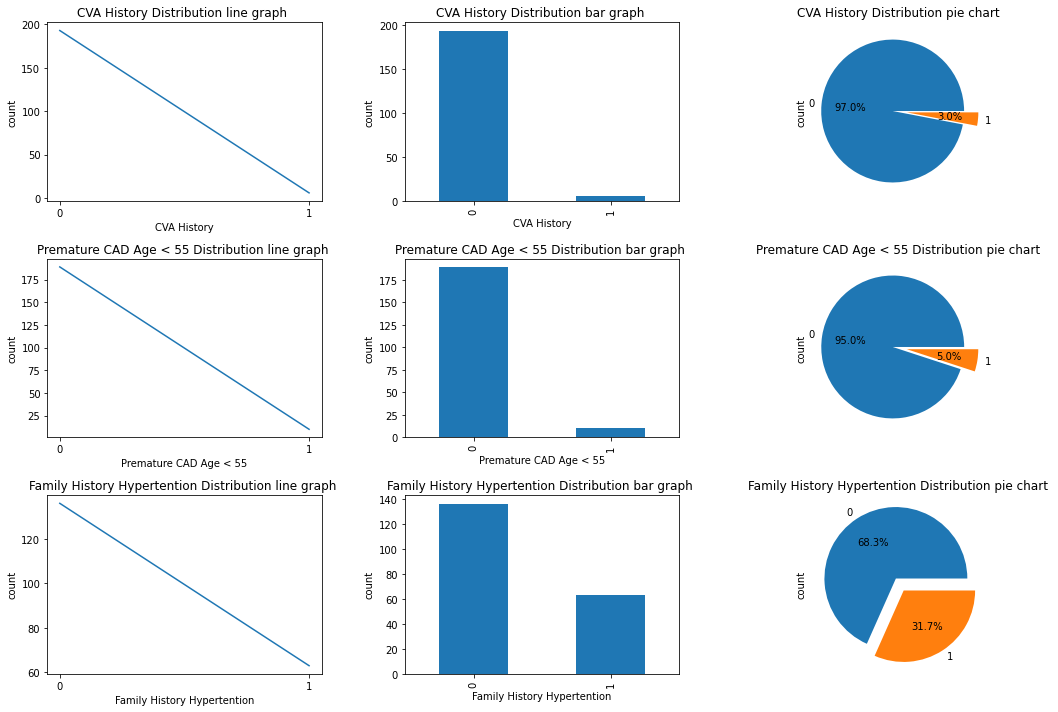

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##21                 Family History Dyslipidemia
##22                           Family History DM
##23                      Morbid Obesity BMI  40


21 24


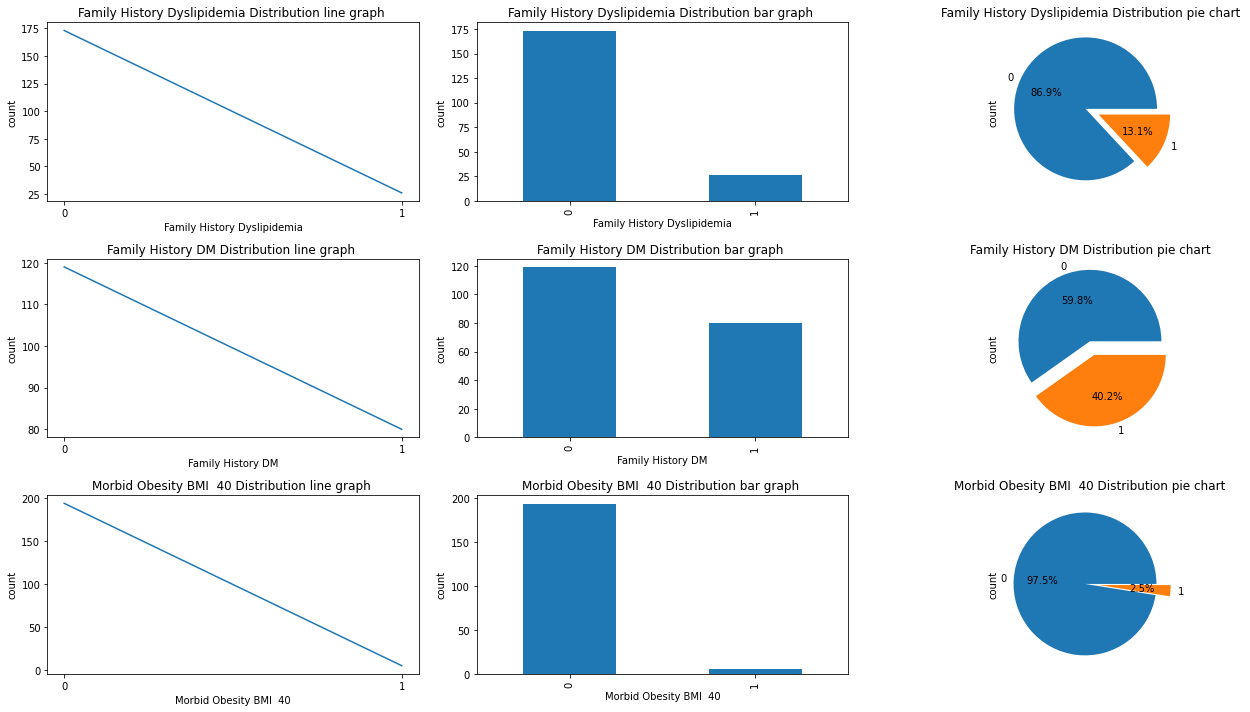

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(18,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##24        Alcoholic Beverages Detailed History
##25                                      Smoker
##26             FH of Premature CAD age < 55yrs


24 27


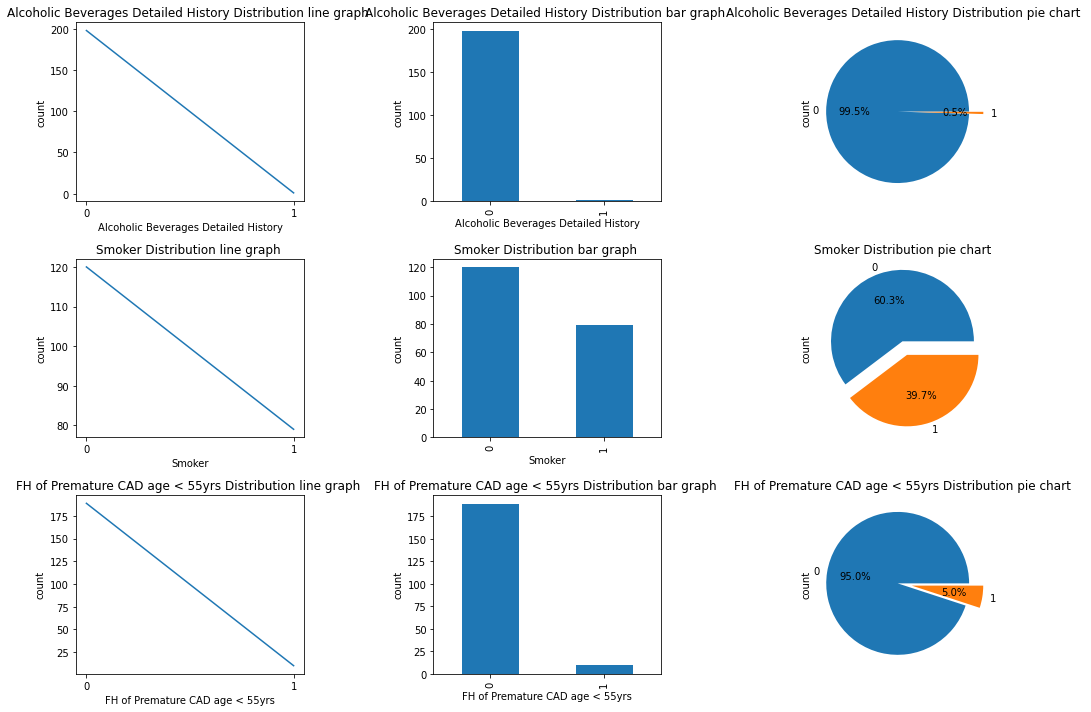

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##27                          Metabolic syndrome
##28                              Heart Sound S1
##29                              Heart Sound S2


27 30


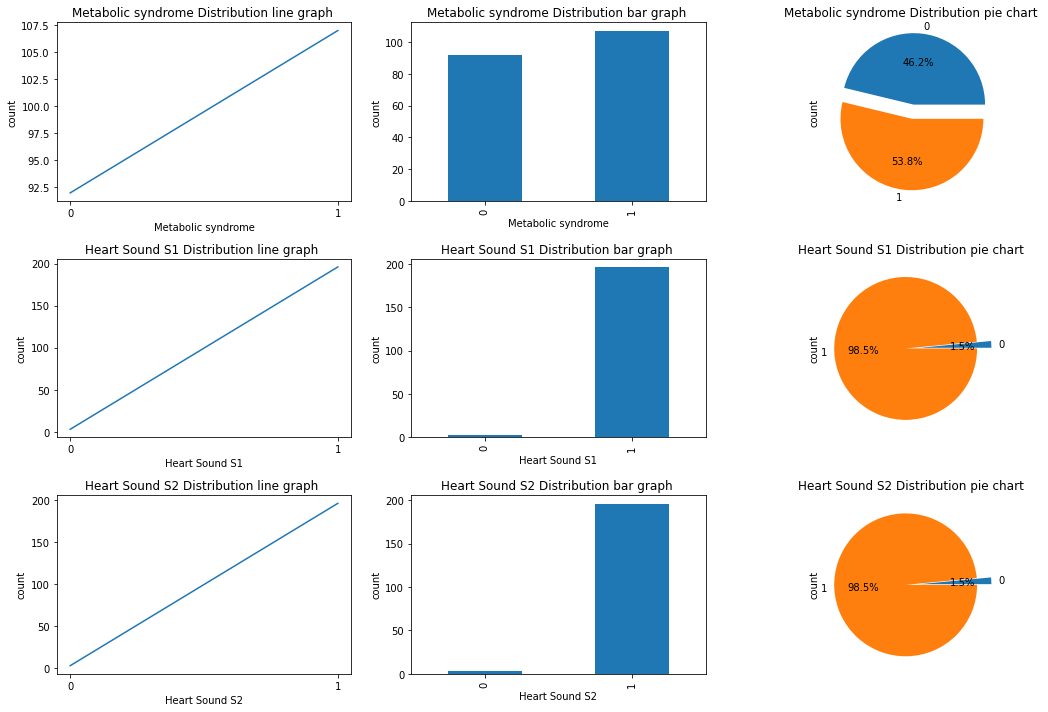

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##30                              Heart Sound S3
##31                              Heart Sound S4
##32                                     Murmurs


30 33


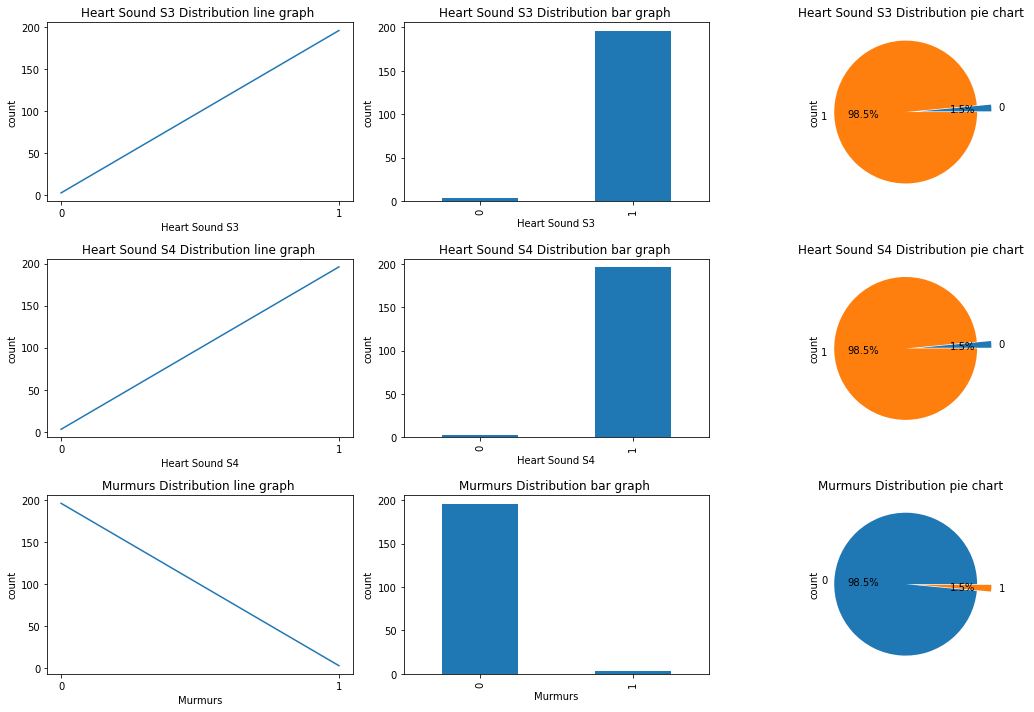

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##33                                          LV
##34                                          RV
##35                    Ischaemic Cardiomyopathy


33 36


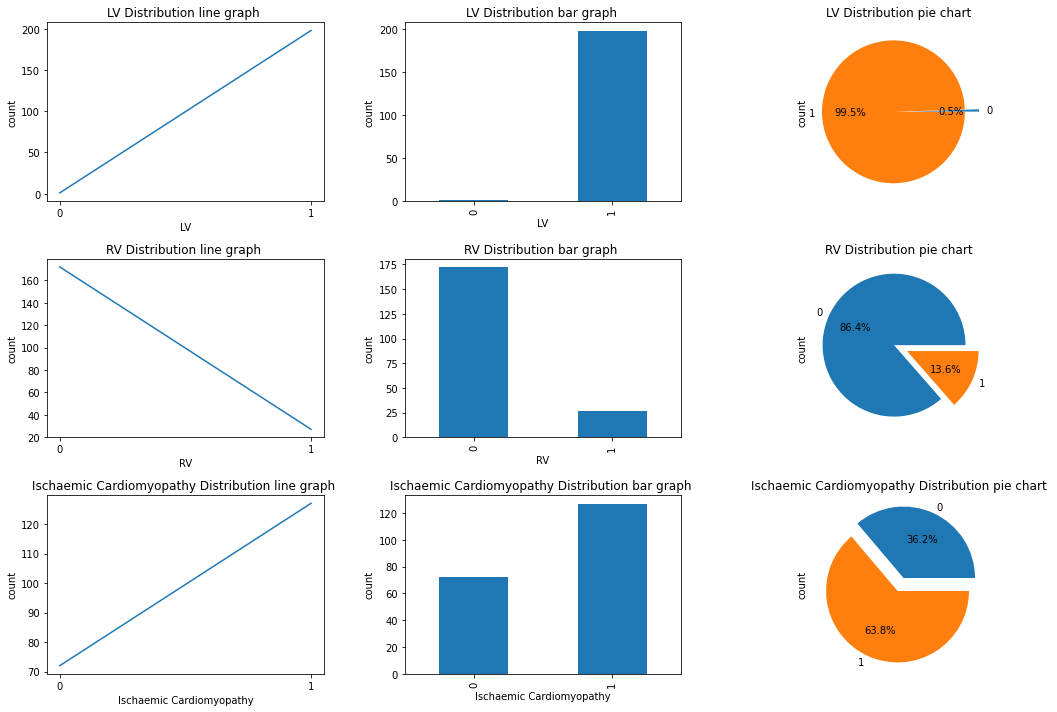

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##36                   Idiopathic Cardiomyopathy
##37                                Hypertensive
##38                                  Peripartum


36 39


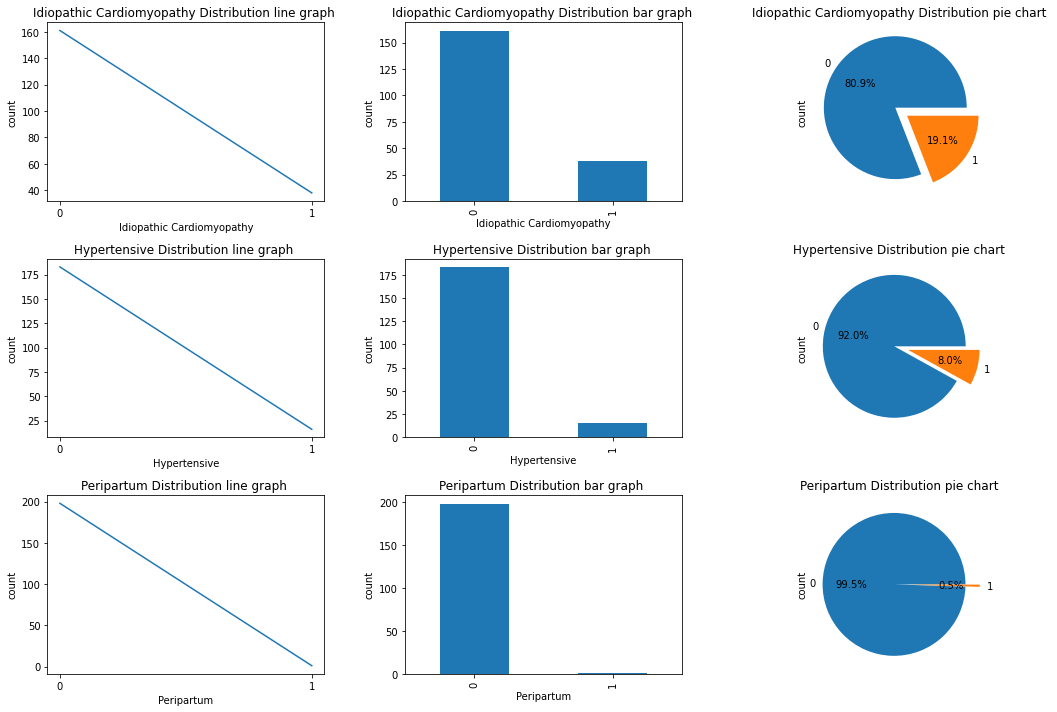

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##39                                    Valvular
##40                                      Statin
##41                                         ACE


39 42


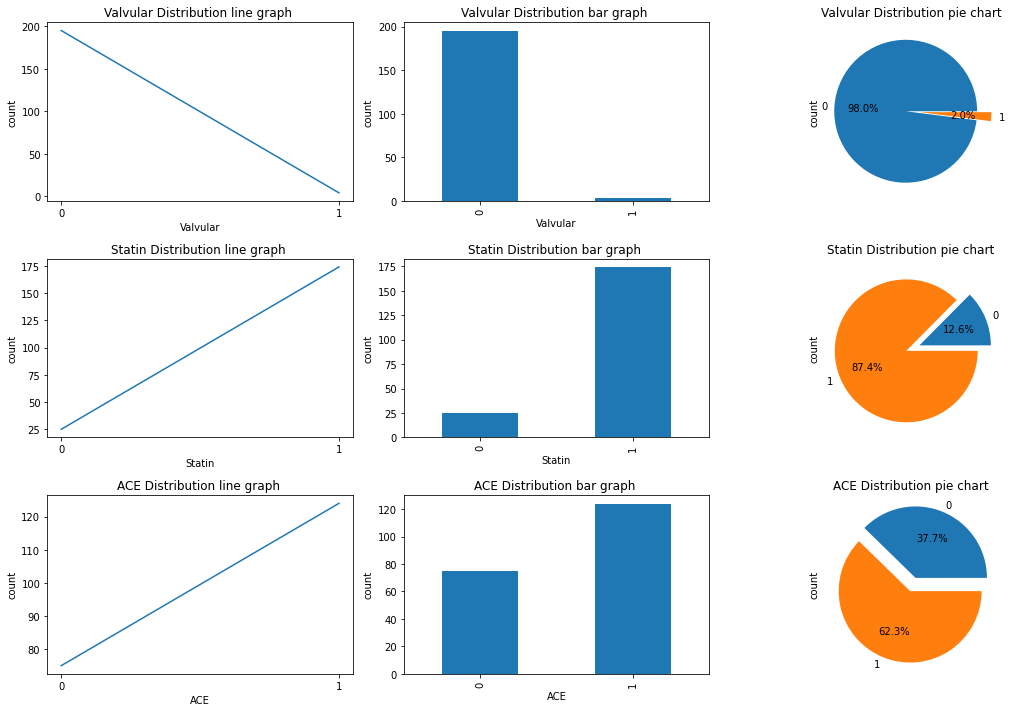

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##42                                         ARB
##43                               Beta Blockers
##44                       Aldactone Antagonists


42 45


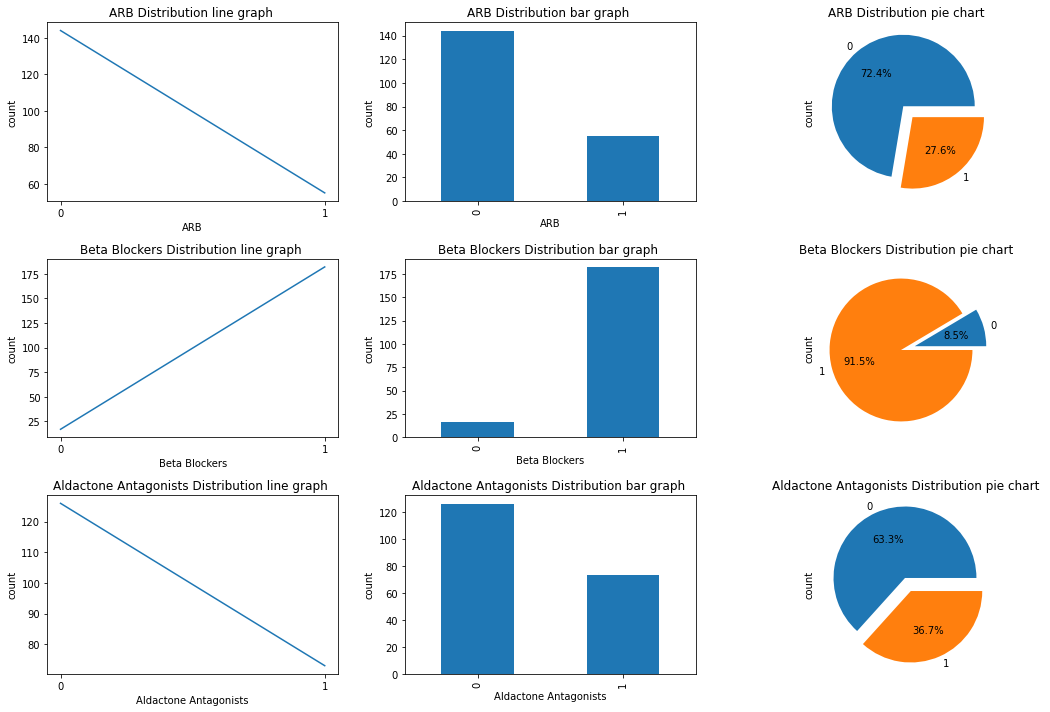

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##45                                   Diuretics
##46                              Anti-platelets
##47                            Anti-coagulation


45 48


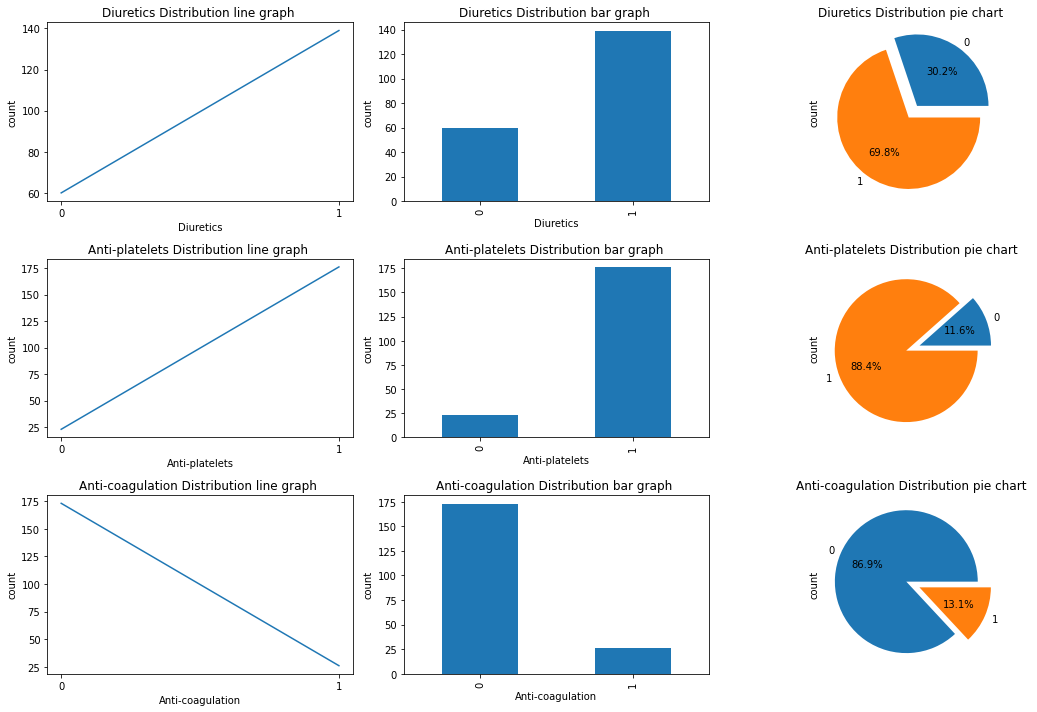

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##48                                Vasodilators
##49                                PHFM Statins
##50                            Anti-Arrhythmics


48 51


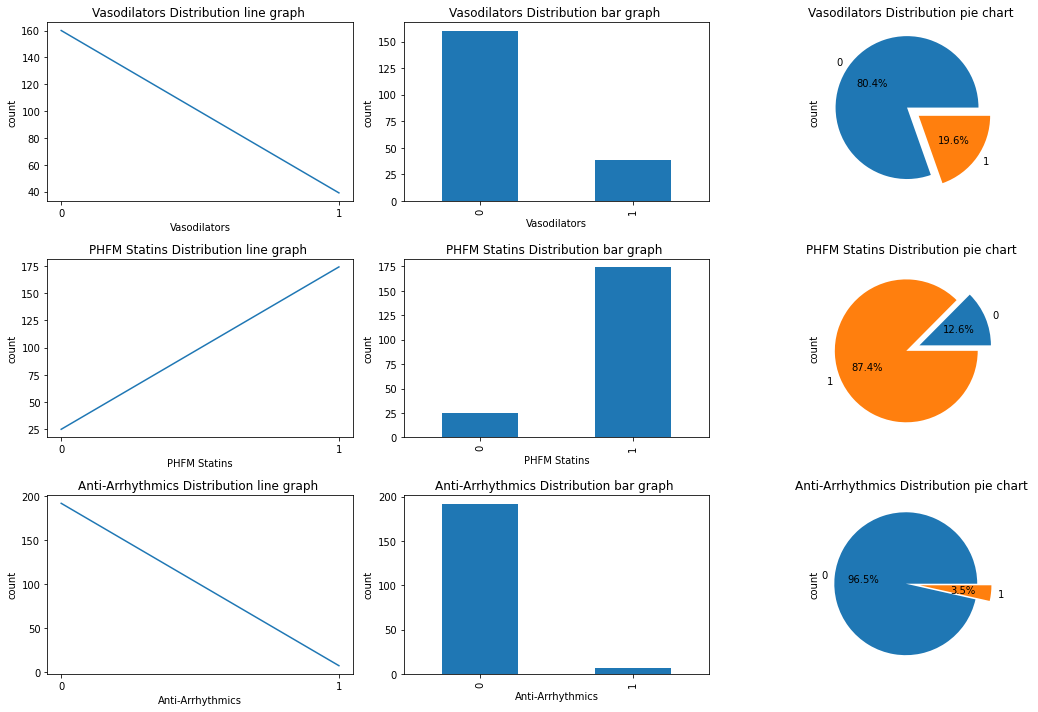

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##51                              Oral Inotropes
##52                             EP Intervention
##53                             Lab_Result_2_Na


51 54


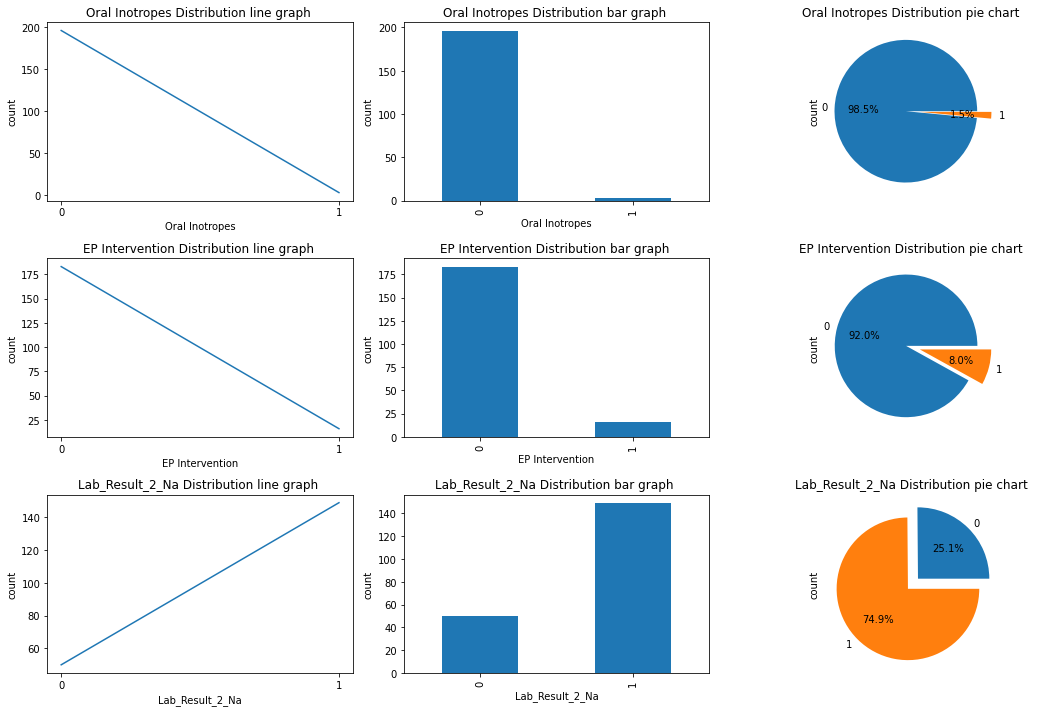

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=3, ncols=3 , figsize=(15,10))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



## Analysis of
##54                         Lab_Result_2_HgbA1C

54 57


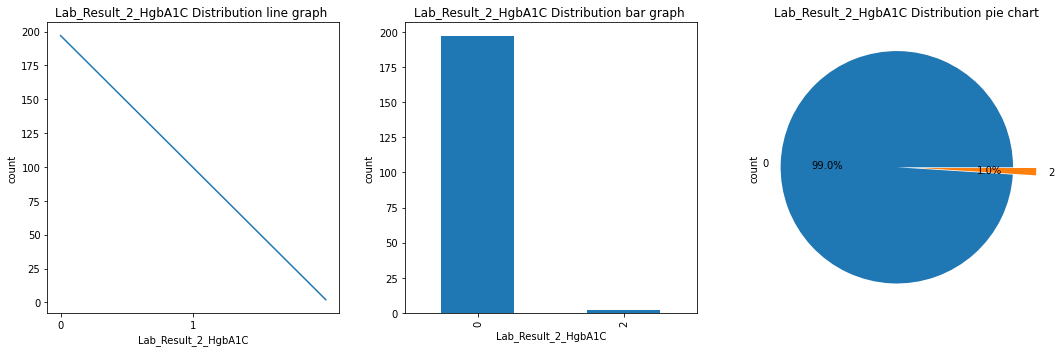

In [ ]:
print(START , END)

fig, axes = plt.subplots(nrows=1, ncols=3 , figsize=(15,5))

for i, col in enumerate(values_df[values_df.Is_binary==True].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[0],xticks = [0,1] ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[2],autopct ='%1.1f%%' ,explode = [0.1,0.1],title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()

START = START+ 3
END = END + 3



# Non Binary Features Analysis

In [ ]:
'''
For Each Non Binary Features see number of values it have and thier count 
'''
grp = values_df[values_df.Is_binary==False].groupby(['No of Values']).Values
grp.describe()

,count,unique,top,freq
No of Values,,,,
1,8,2,[0],7
3,15,15,"[1, 0, 2]",1
4,9,9,"[2, 3, 4, 0]",1
6,1,1,"[4, 2, 5, 0, 3, 1]",1
8,4,4,"[0, 3, 5, 4, 2, 6, 1, 7]",1
9,3,3,"[0, 7, 1, 2, 4, 3, 5, 6, 9]",1
10,21,21,"[4, 9, 7, 5, 0, 6, 8, 2, 3, 1]",1
11,2,2,"[3, 0, 1, 2, 5, 7, 4, 6, 10, 13, 8]",1


In [ ]:

no_of_values_count_dict = {
 1:8 ,
 3:15,
 4:9 , 
 6:1 , 
 8:4 , 
 9:3 , 
 10:21,
 11:2

}
non_binary_df = pd.DataFrame(
    {
        
 'Number of values = 1':[8] ,
 'Number of values =  3':[15],
 'Number of values = 4':[9] , 
 'Number of values = 6':[1] , 
 'Number of values = 8':[4] , 
 'Number of values = 9':[3] , 
 'Number of values = 10':[21],
 'Number of values = 11':[2]




    } , index = ['Count / Number of Features ']
).T
non_binary_df

,Count / Number of Features
Number of values = 1,8
Number of values = 3,15
Number of values = 4,9
Number of values = 6,1
Number of values = 8,4
Number of values = 9,3
Number of values = 10,21
Number of values = 11,2


In [ ]:
indexer = 0
df = pd.DataFrame(non_binary_df.iloc[indexer])


,Number of values = 1,Feature Names
Count / Number of Features,8,Index(['Optimal Medication treatment/Aggressiv...


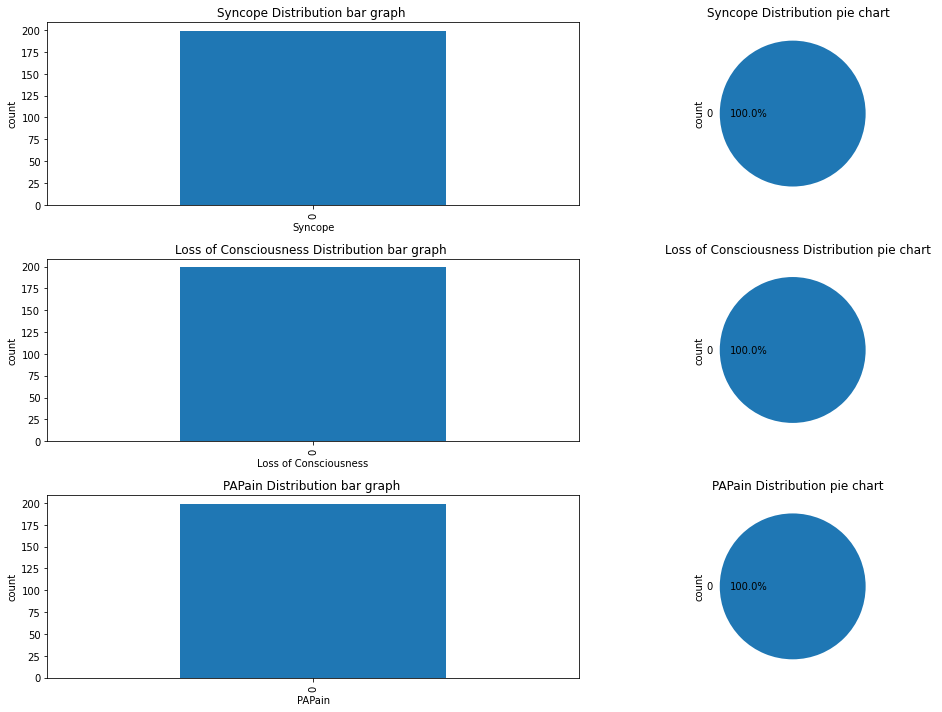

In [ ]:
START = 0 
END = 3 
indexer = 0 
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(15,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 

  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,0] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,1],autopct ='%1.1f%%' ,explode = [0.1]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

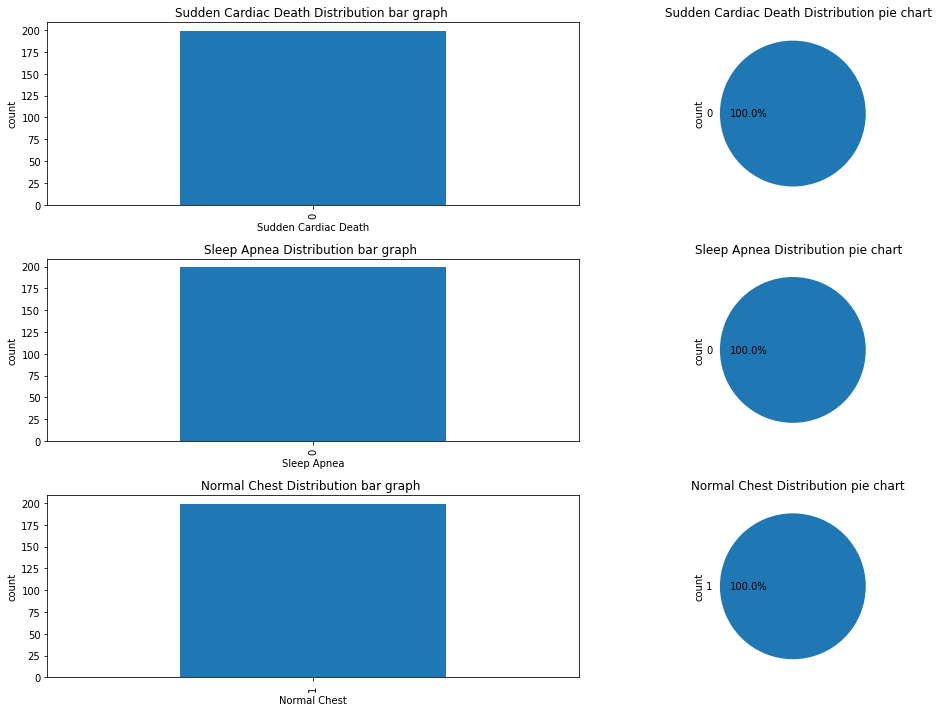

In [ ]:
indexer = 0 
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(15,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 

  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,0] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,1],autopct ='%1.1f%%' ,explode = [0.1]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

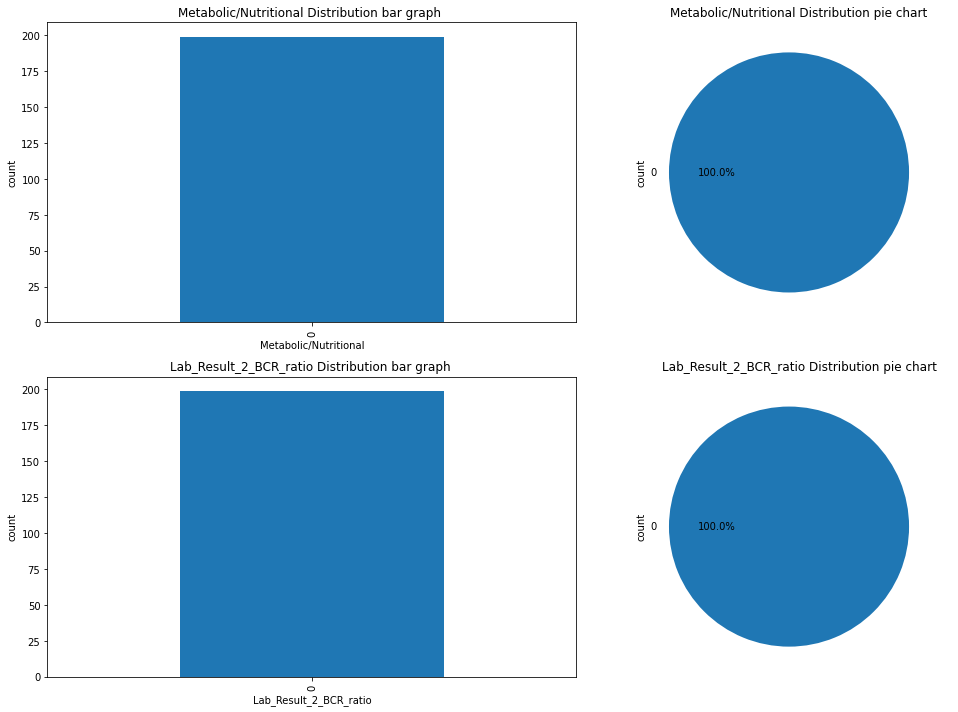

In [ ]:
indexer = 0 
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 2 , ncols=2 , figsize=(15,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 

  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,0] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,1],autopct ='%1.1f%%' ,explode = [0.1]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 
indexer = indexer + 1

In [ ]:
key = list_of_keys[indexer]
indexer

1

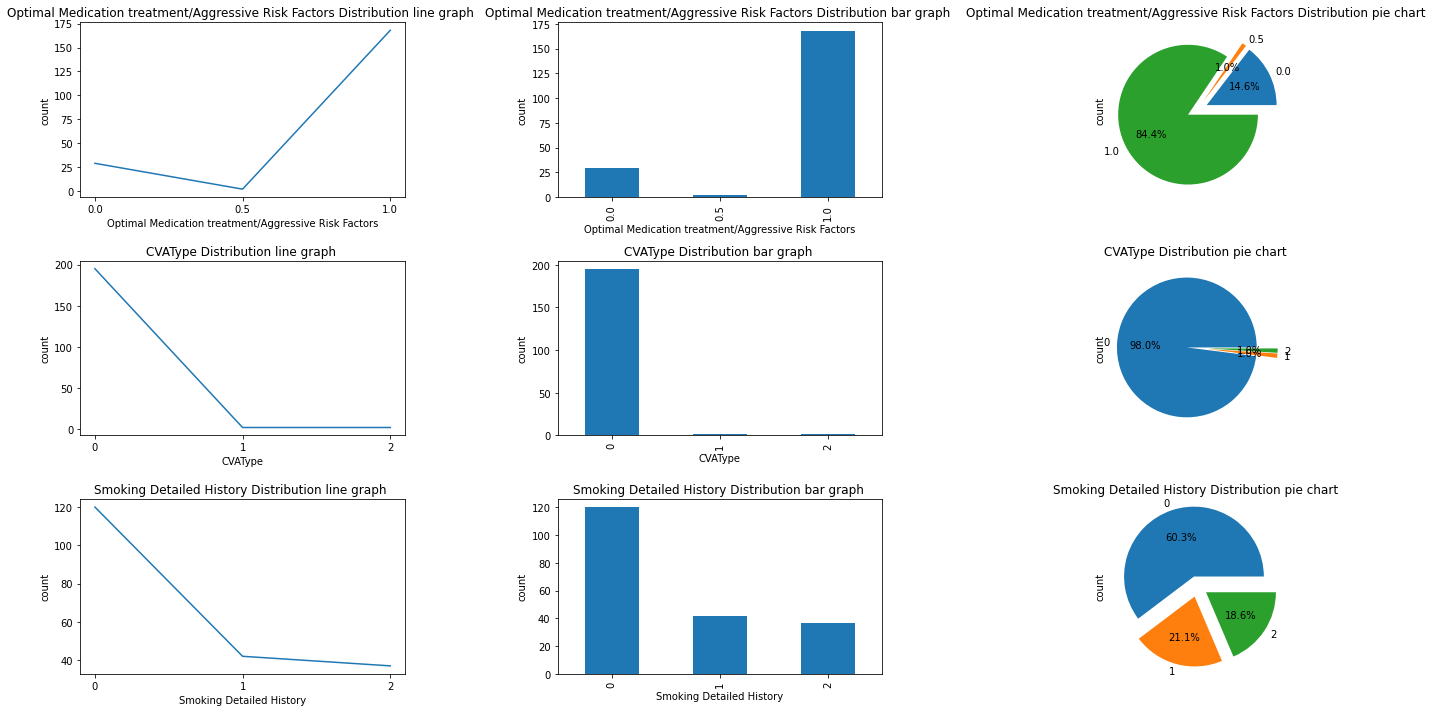

In [ ]:
START = 0 
END = 3 
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

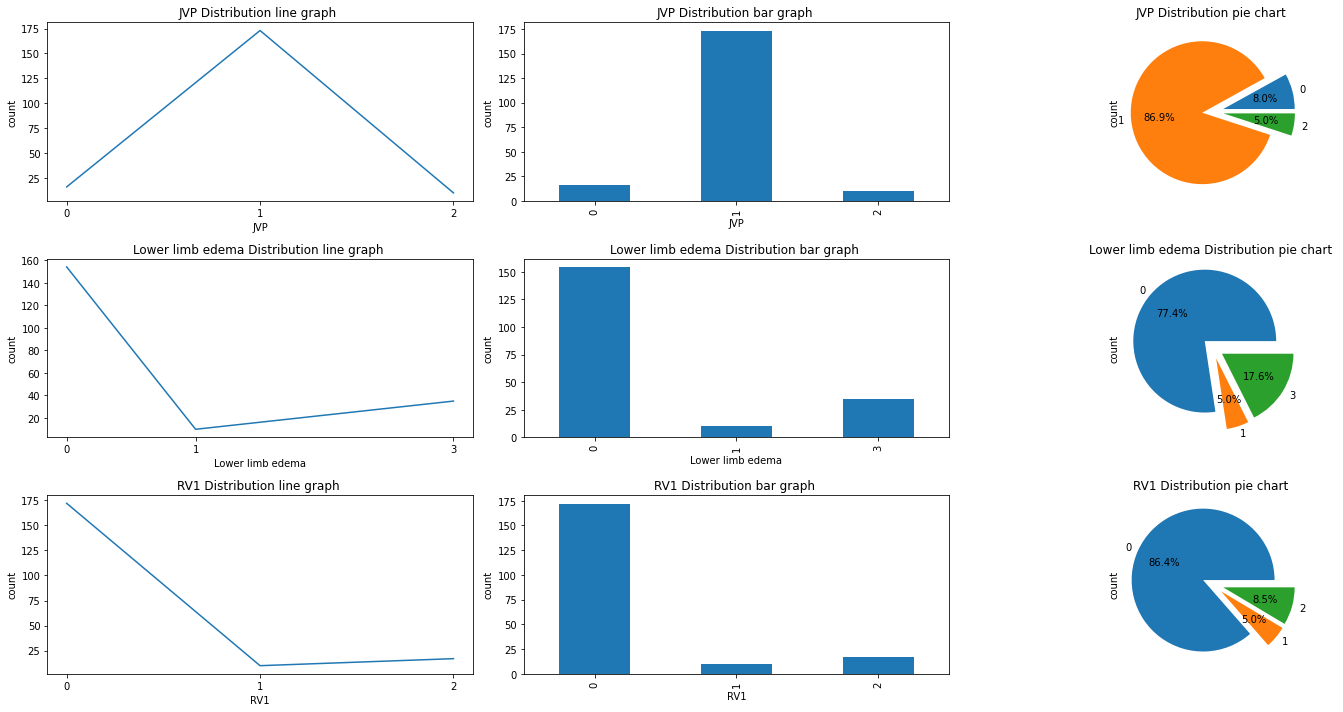

In [ ]:

key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

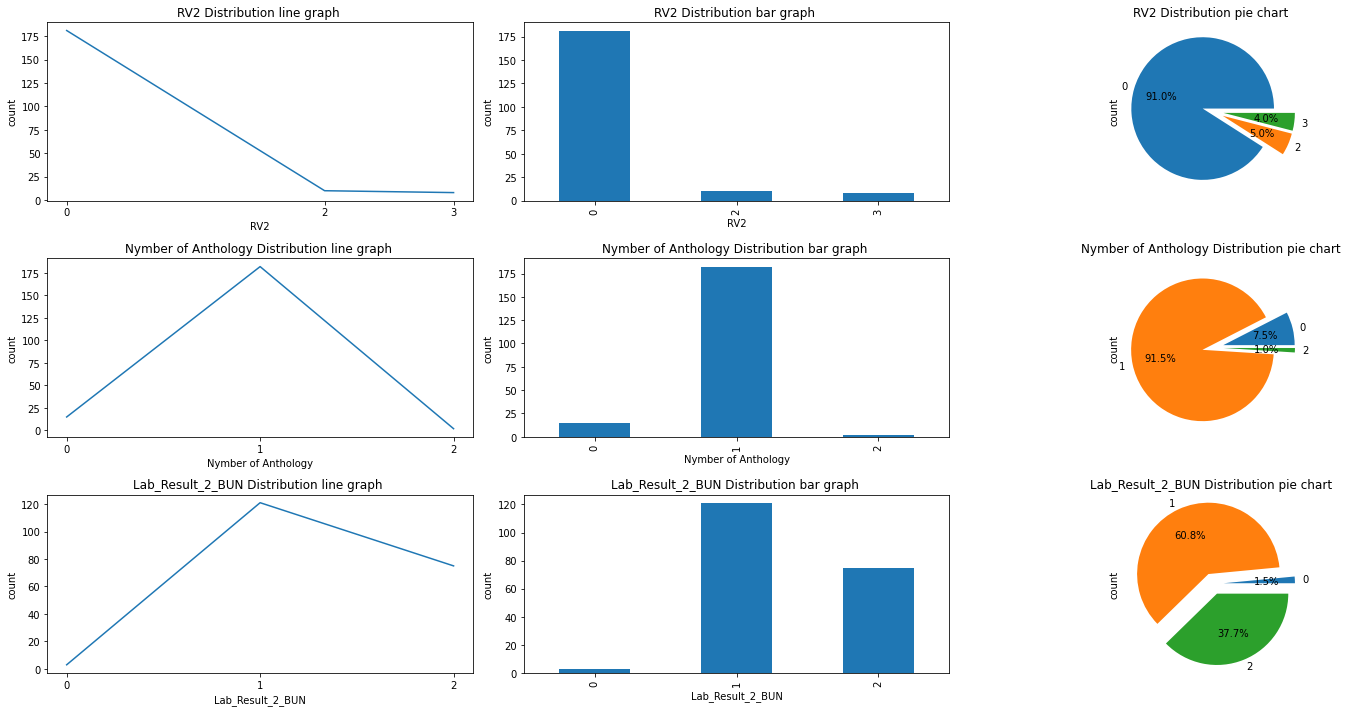

In [ ]:
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

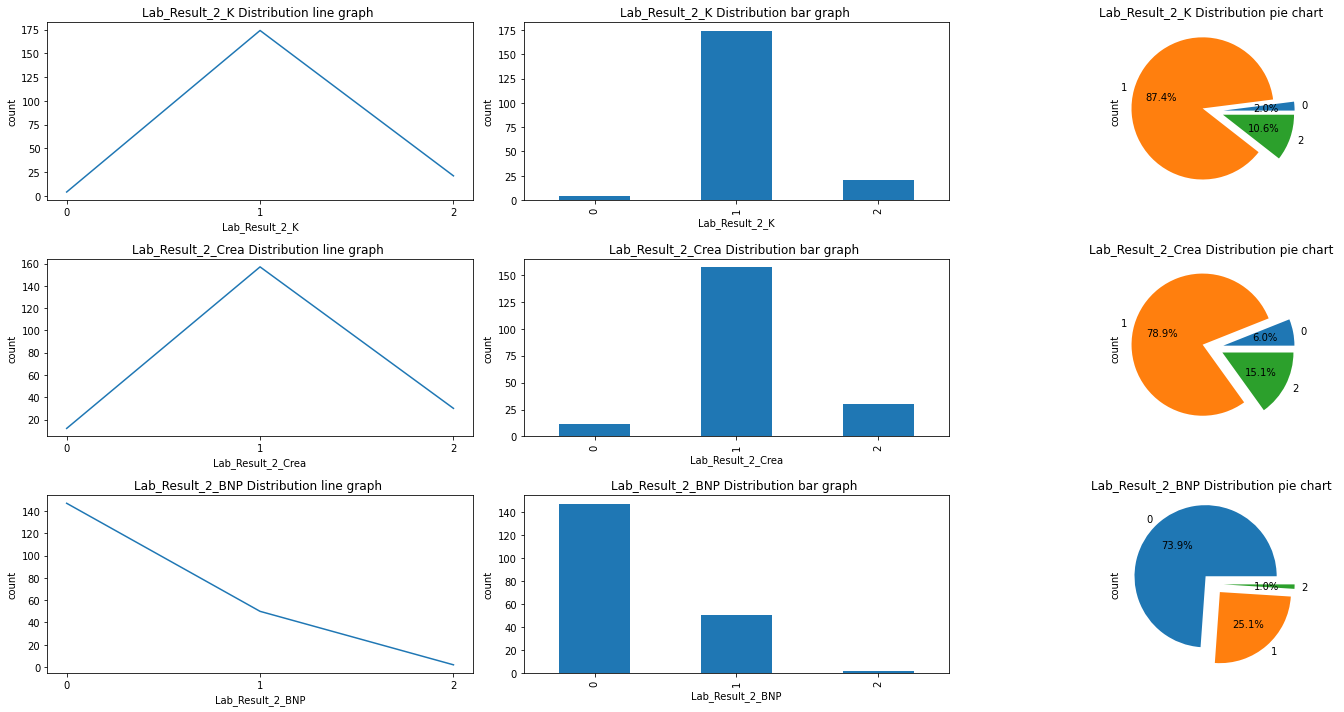

In [ ]:
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

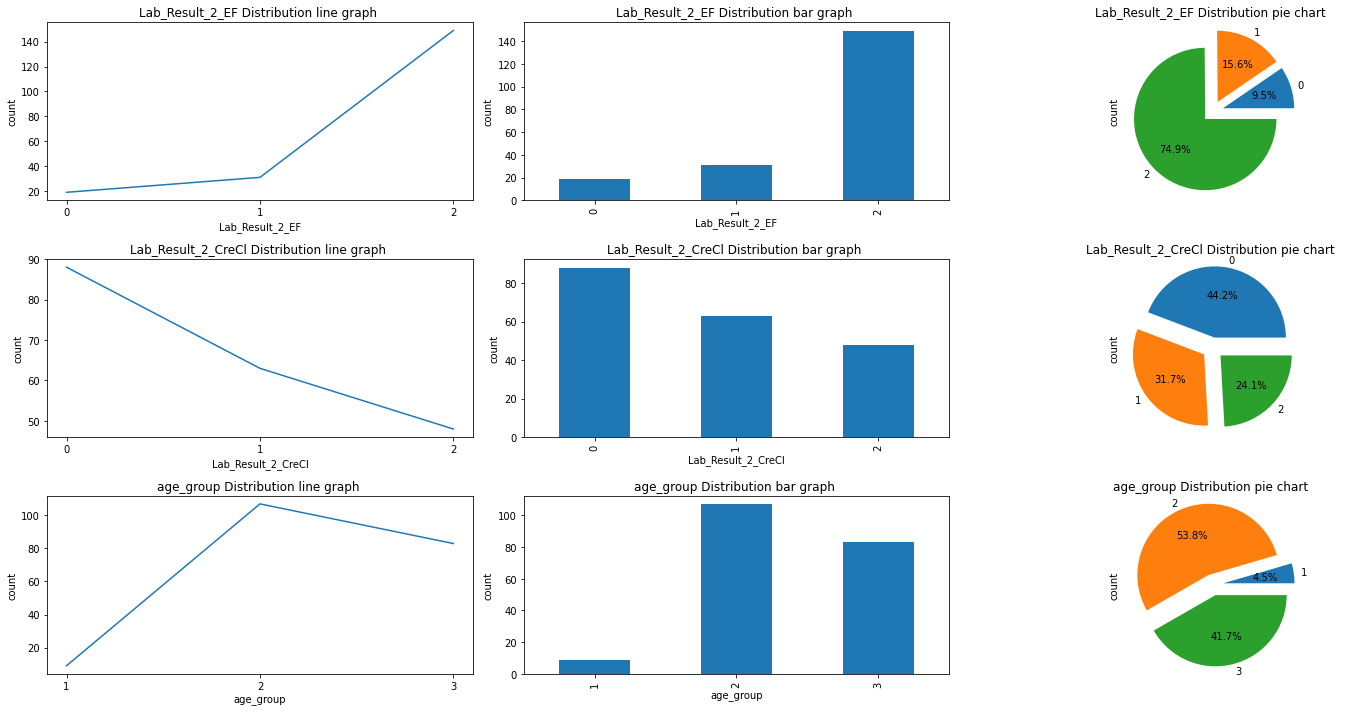

In [ ]:
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1

In [ ]:
len(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index)

9

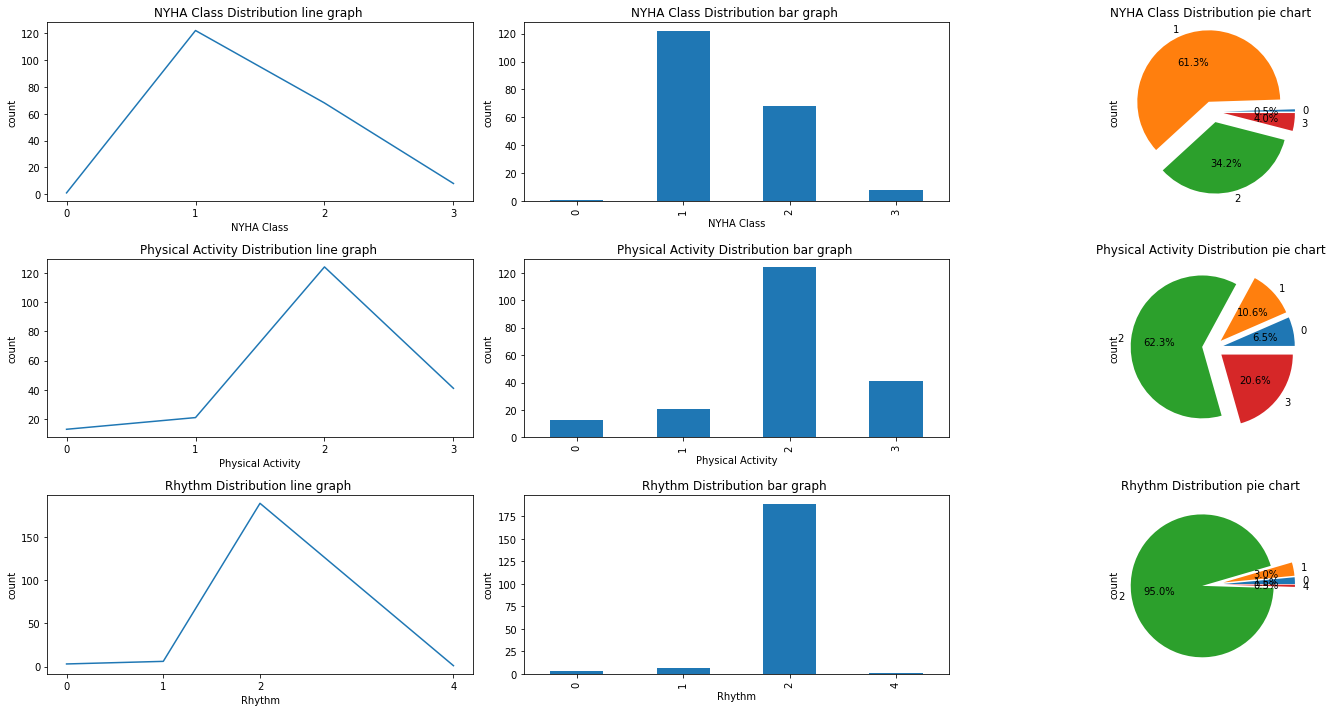

In [ ]:
START =  0
END = 3
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

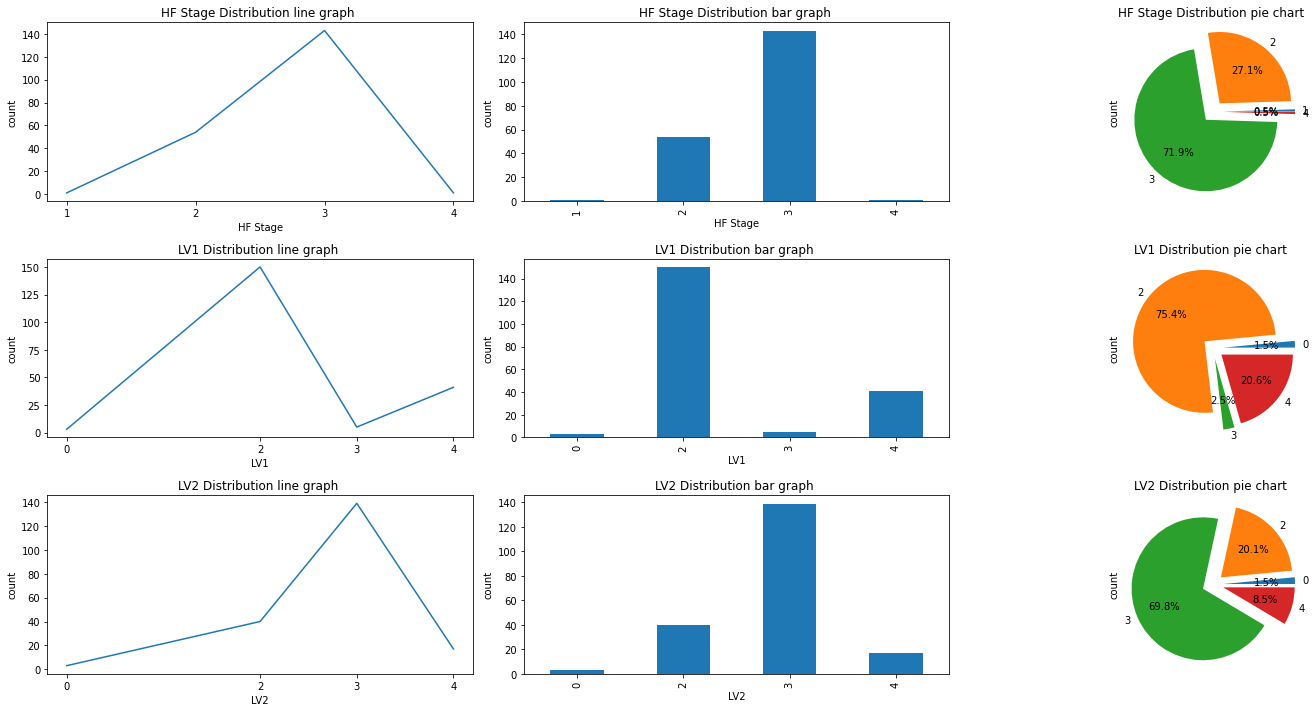

In [ ]:
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

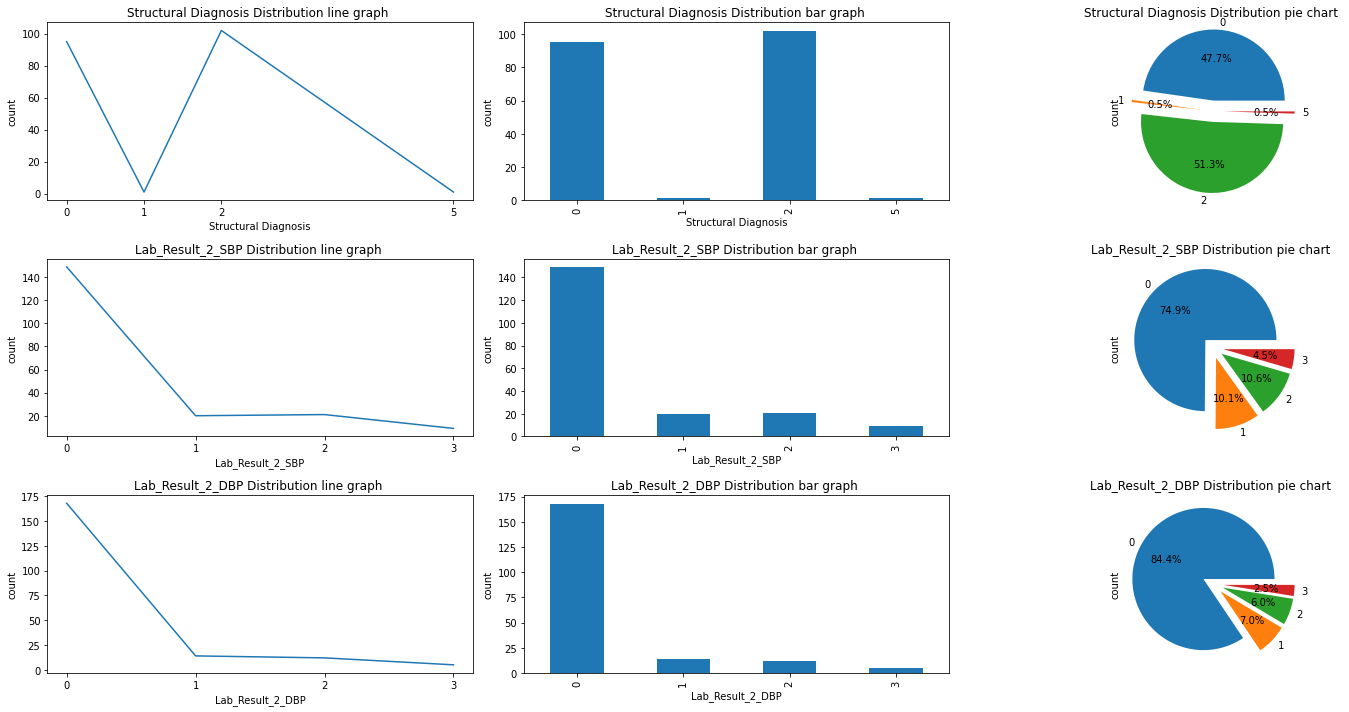

In [ ]:

key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[i,2],autopct ='%1.1f%%' ,explode = [0.15]*key,title = '{} Distribution pie chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1

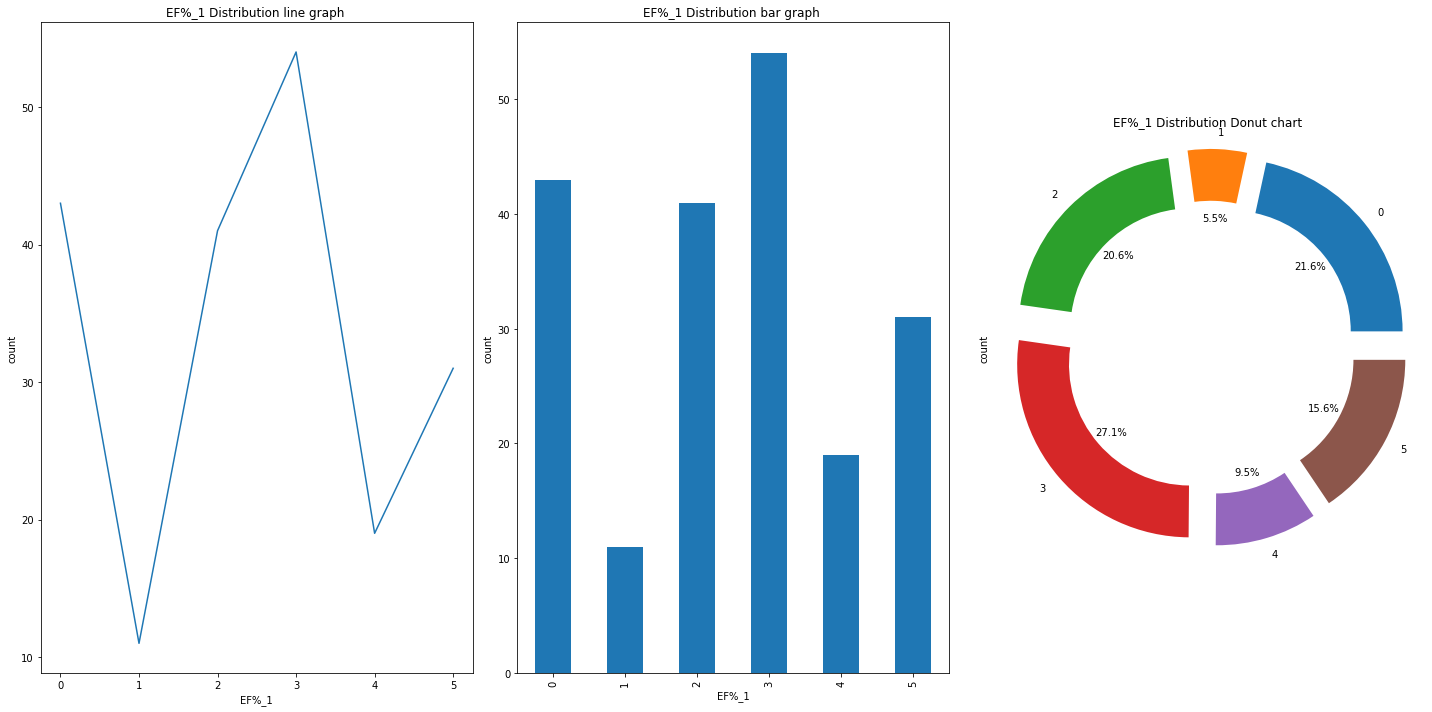

In [ ]:
START = 0
END = 3
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 1 , ncols=3 , figsize=(20,10))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind = 'pie' ,ax =axes[2],autopct ='%1.1f%%' ,explode = [0.15]*key, wedgeprops=dict(width=.3) ,title = '{} Distribution Donut chart '.format(col)
  ,xlabel = col , ylabel = 'count')

plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1

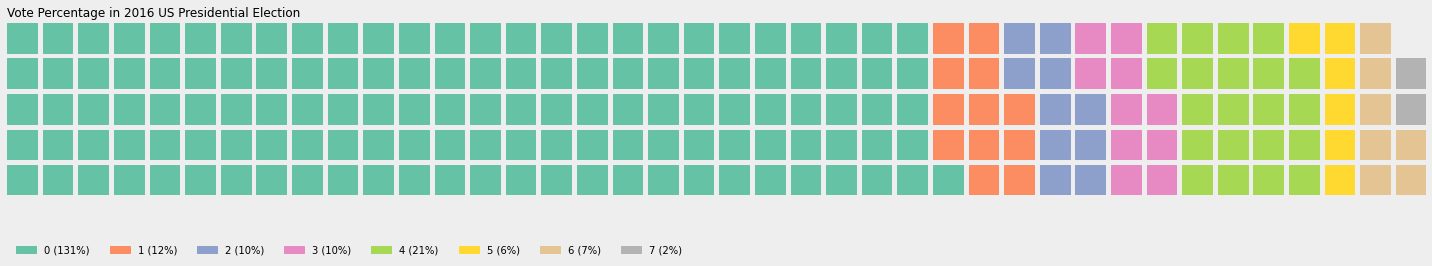

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = info_df['2011'].value_counts().sort_index().to_dict()
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    figsize = (20,10),
    values=data, 
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [ ]:
round(30 / info_df['2011'].value_counts().sort_index().sum(),3)

0.151

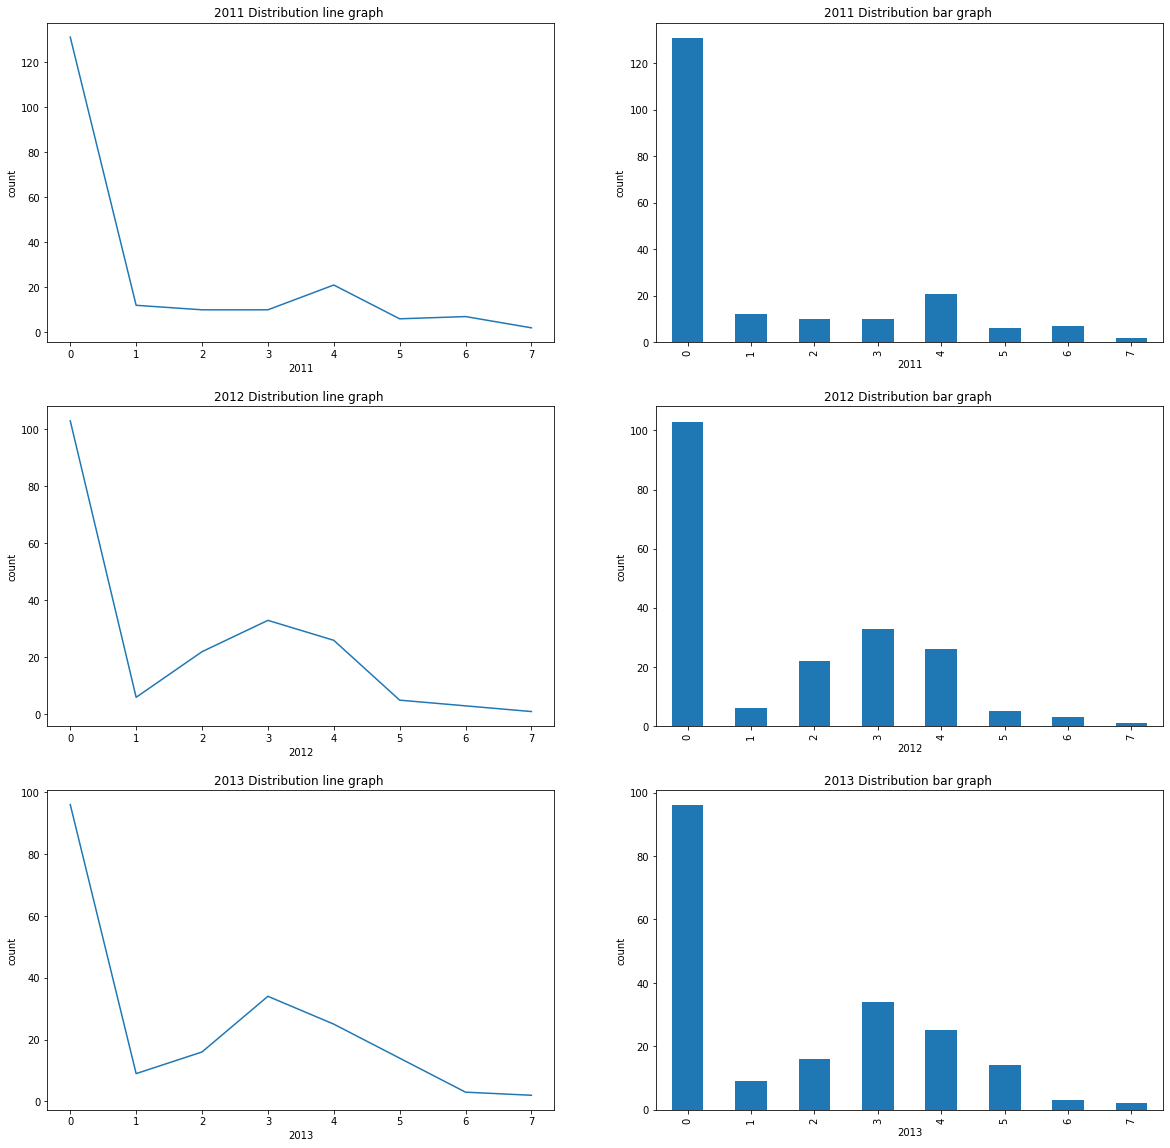

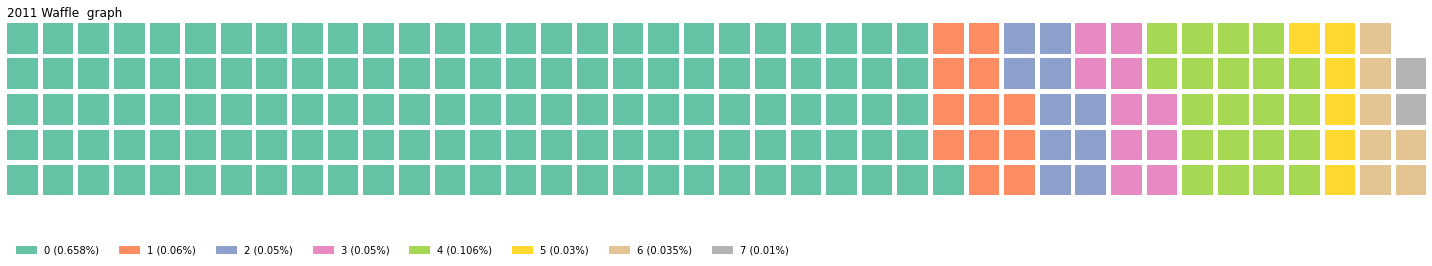

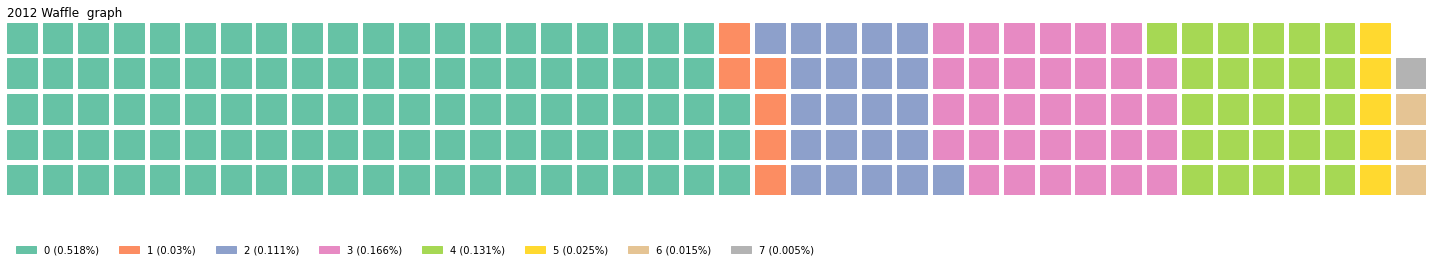

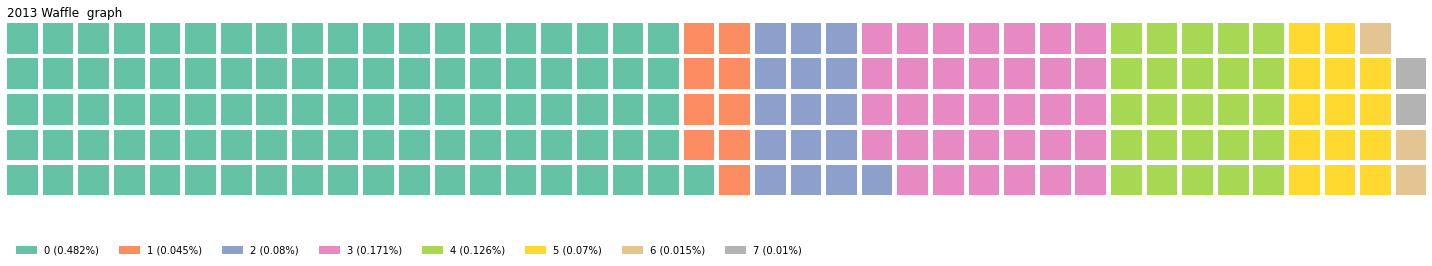

In [ ]:
START = 0
END = 3
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

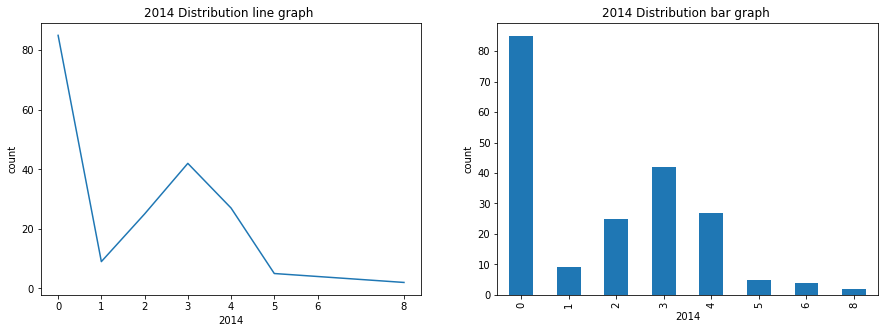

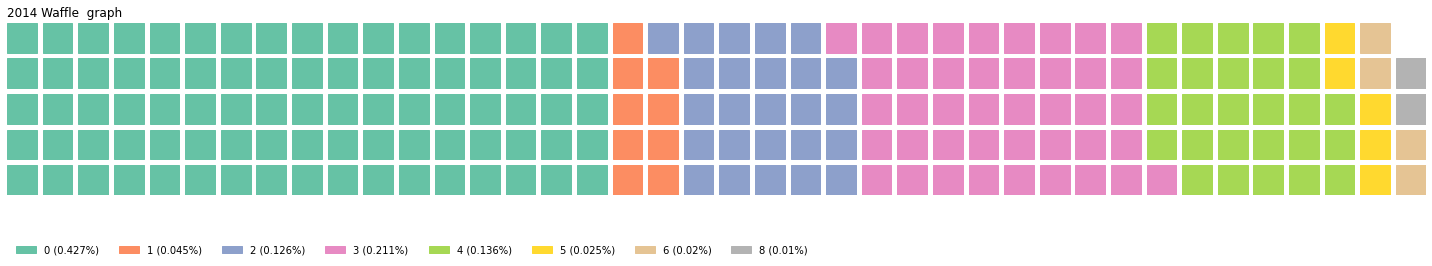

In [ ]:

key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 1 , ncols=2 , figsize=(15,5))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1 

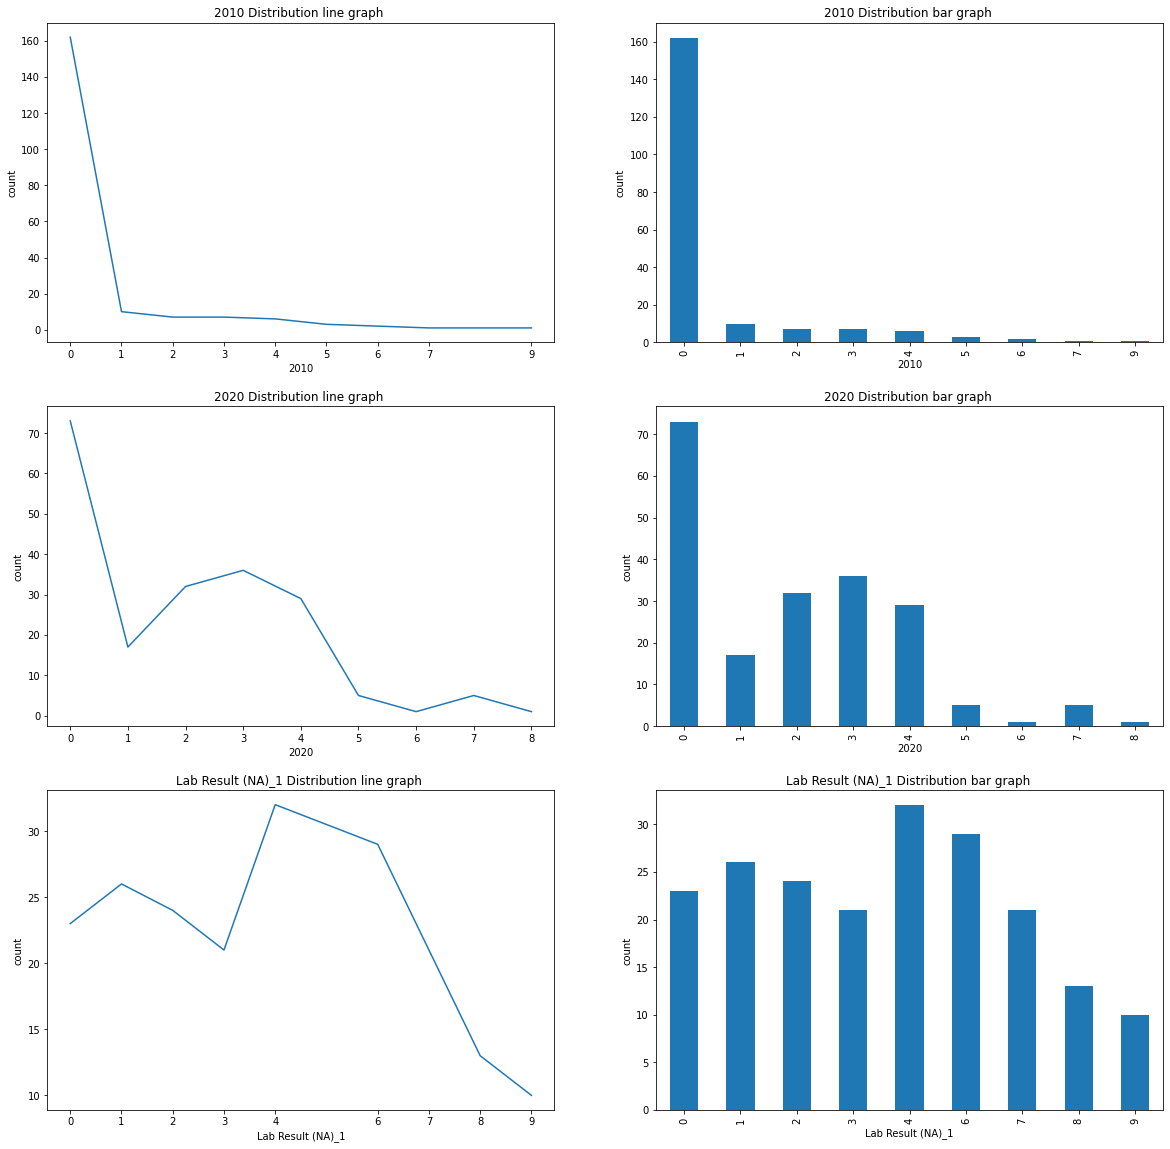

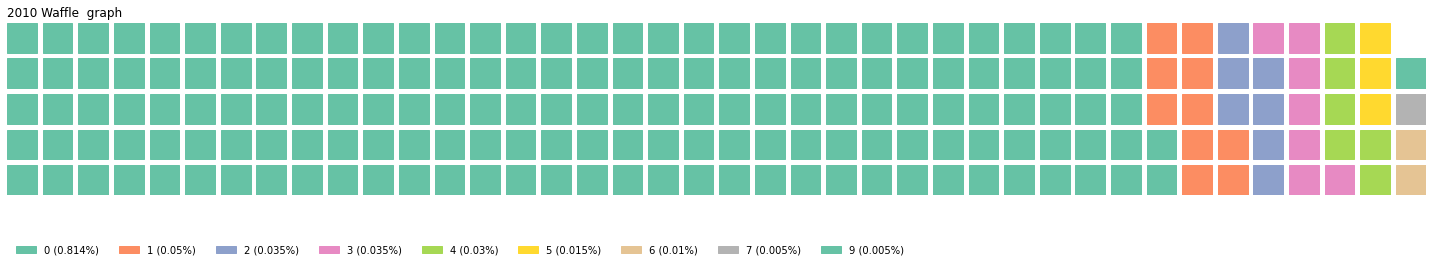

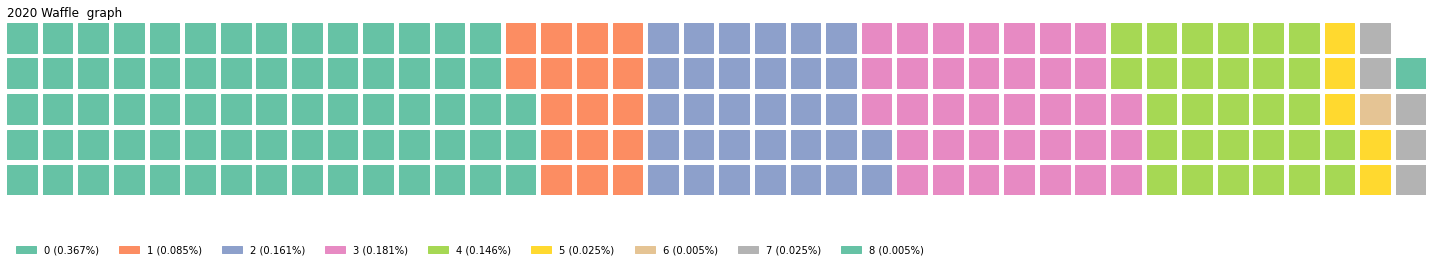

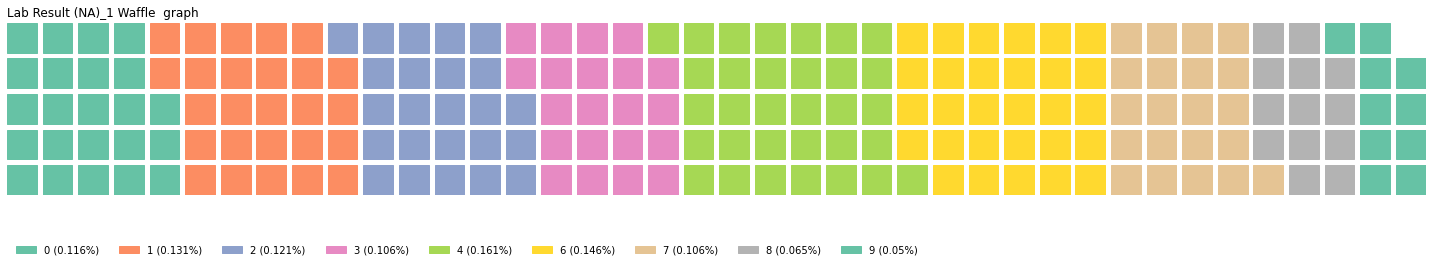

In [ ]:
START = 0
END = 3
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1 

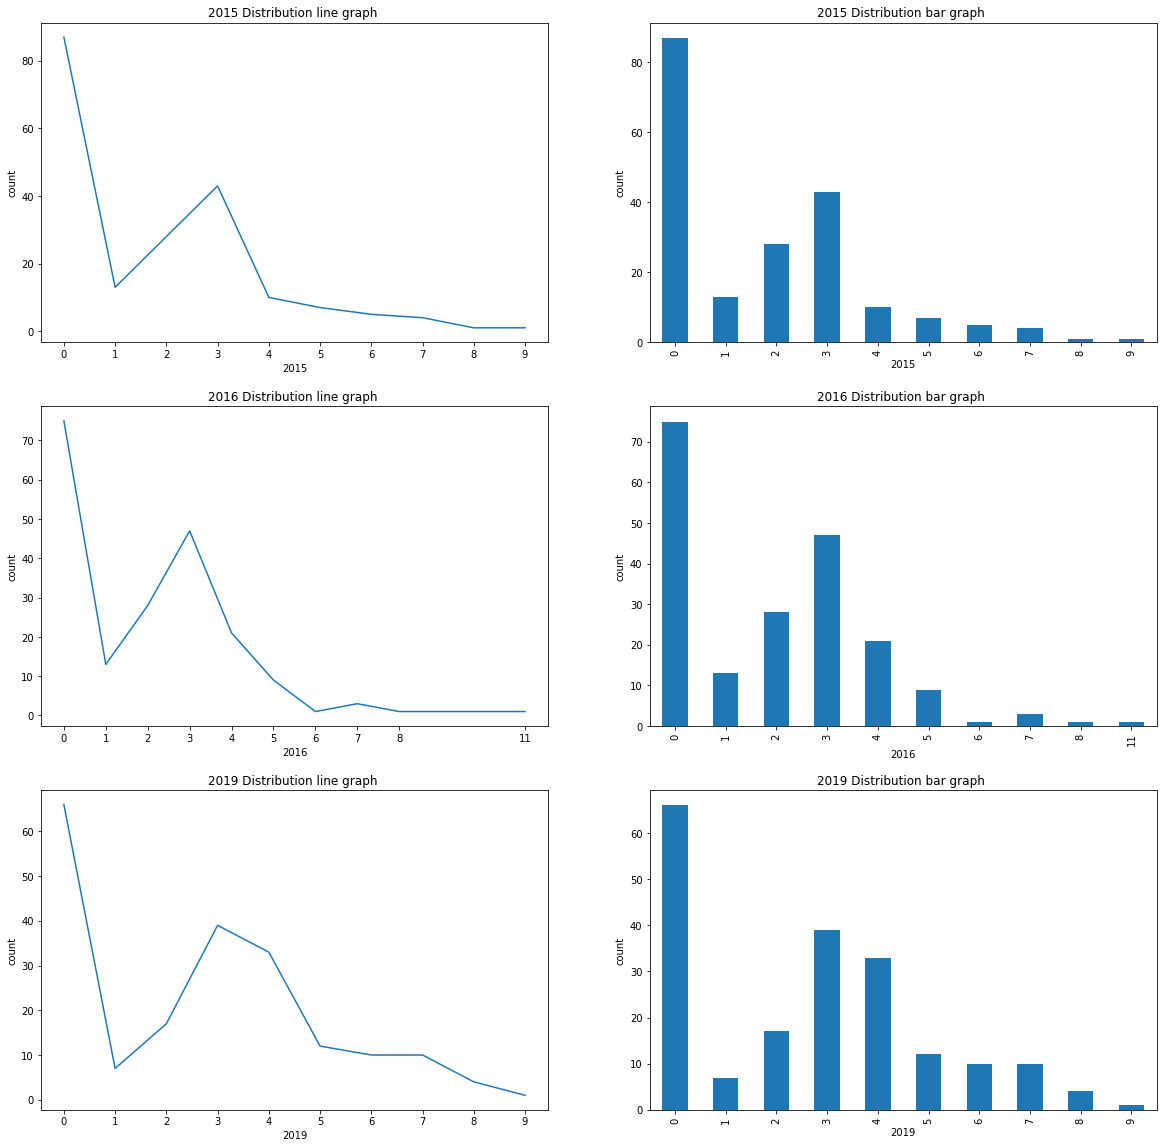

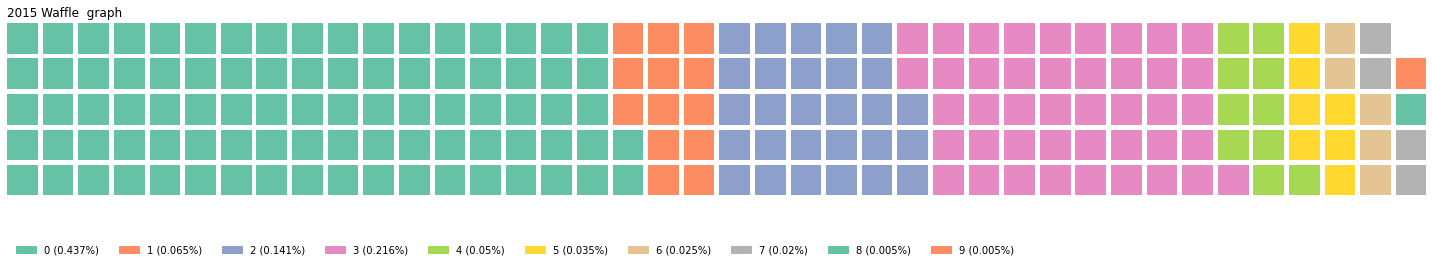

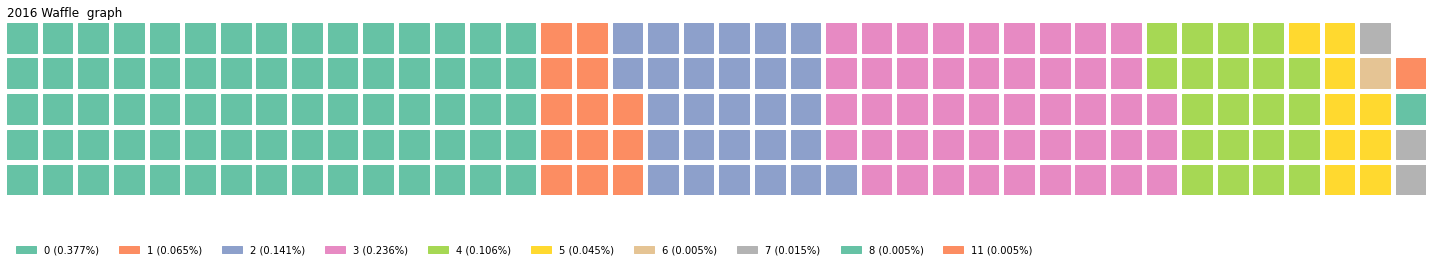

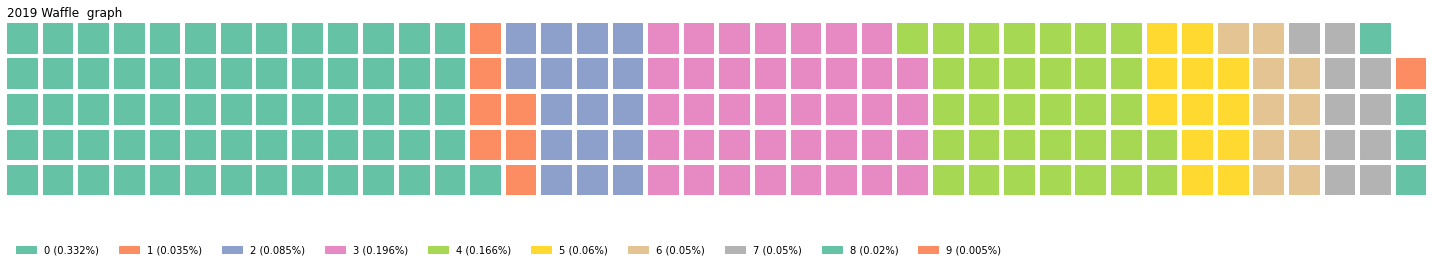

In [ ]:
START = 0
END = 3

key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

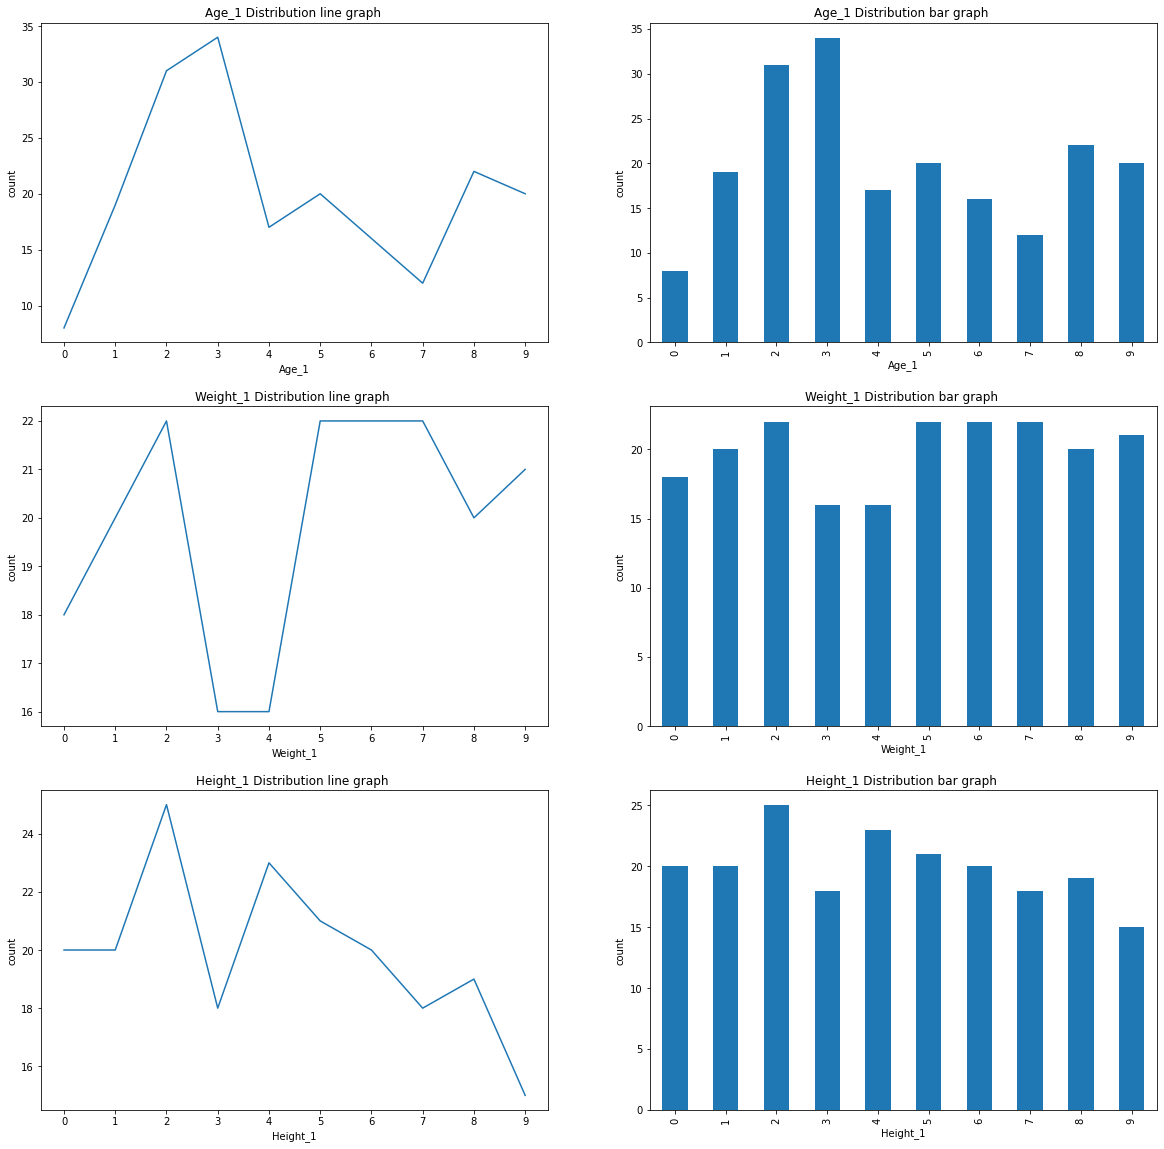

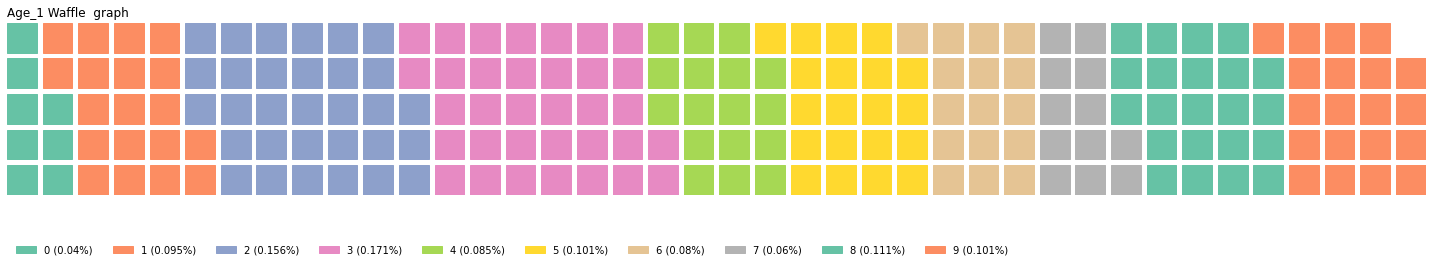

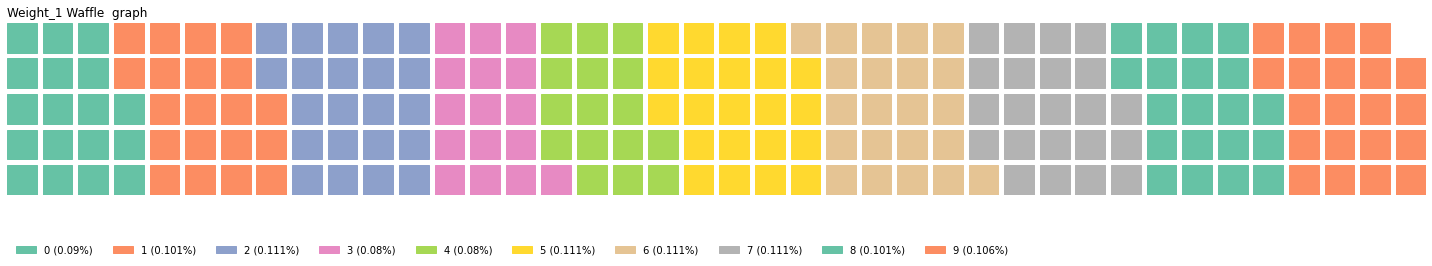

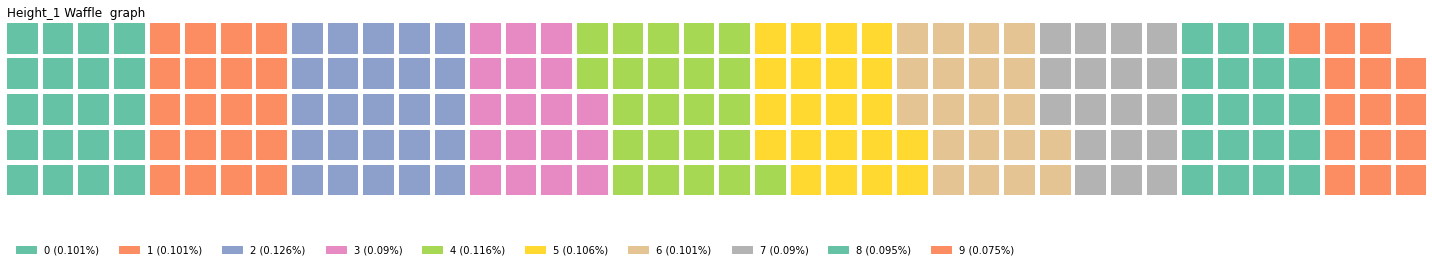

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

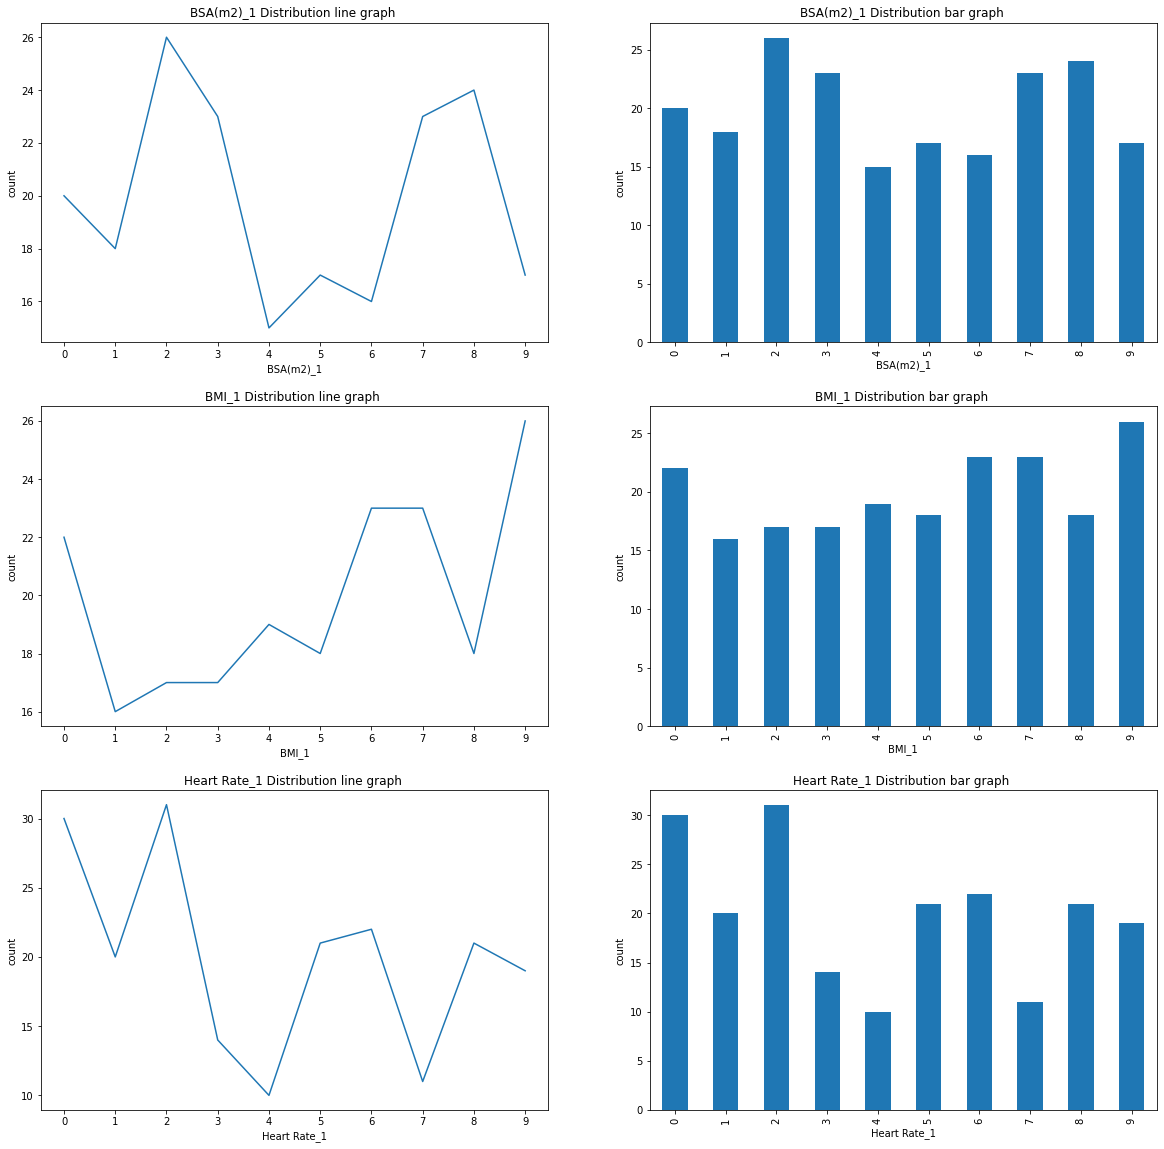

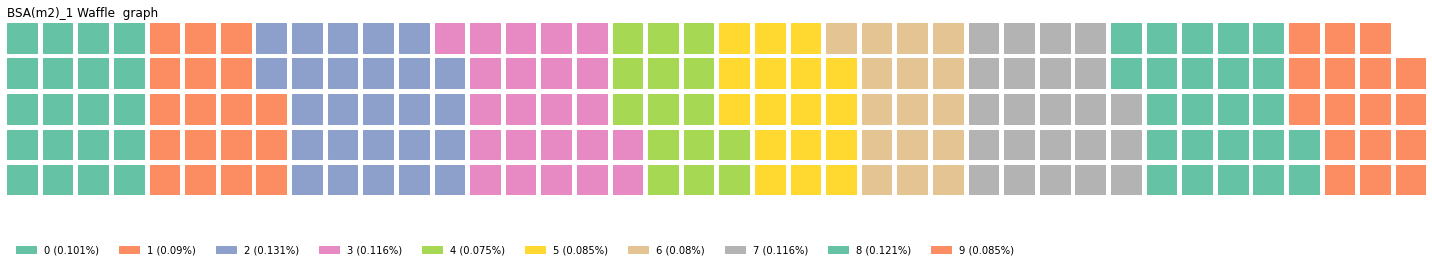

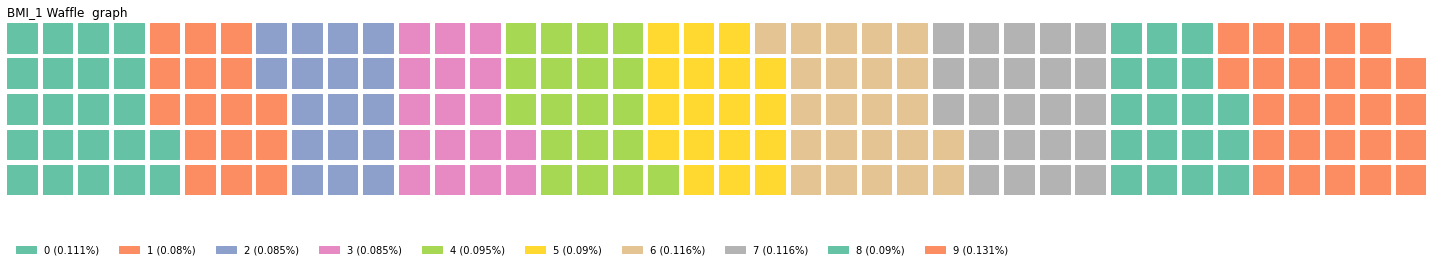

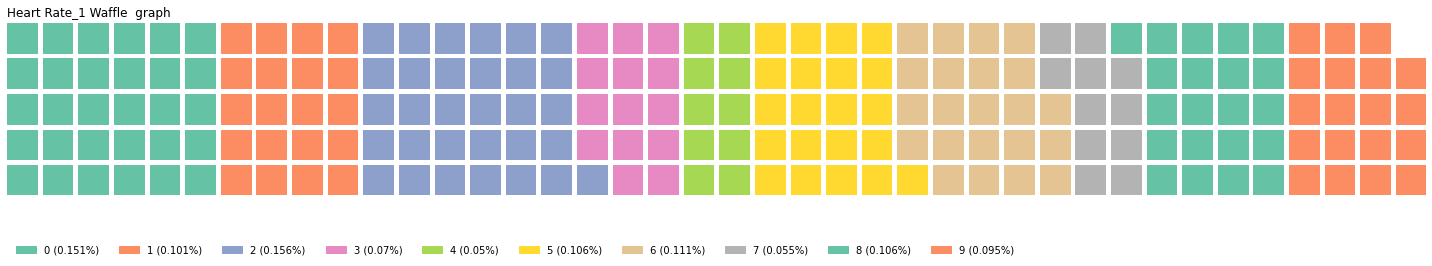

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

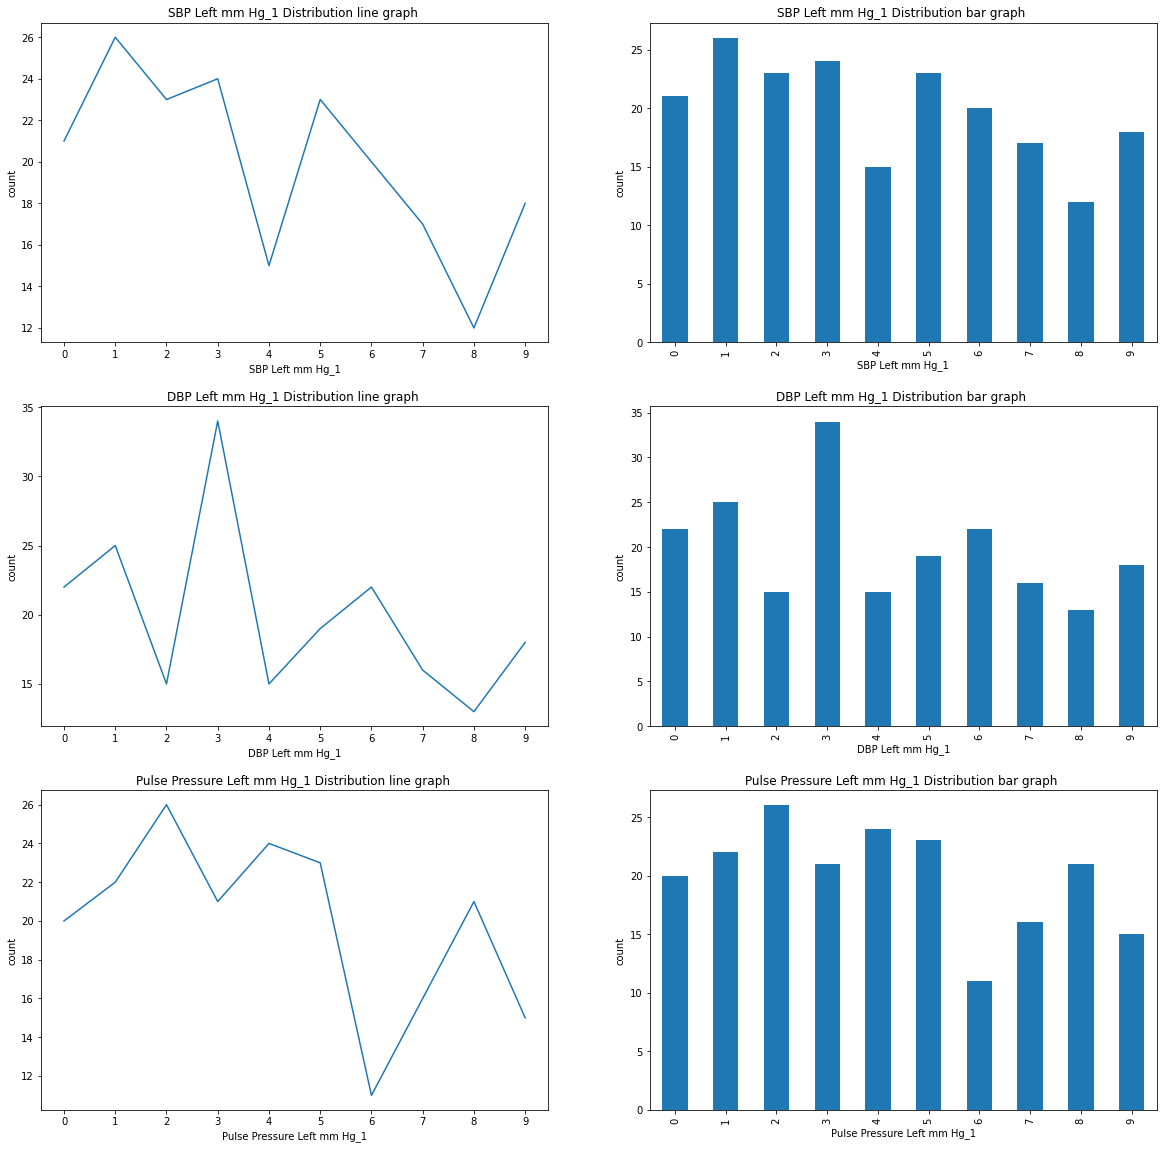

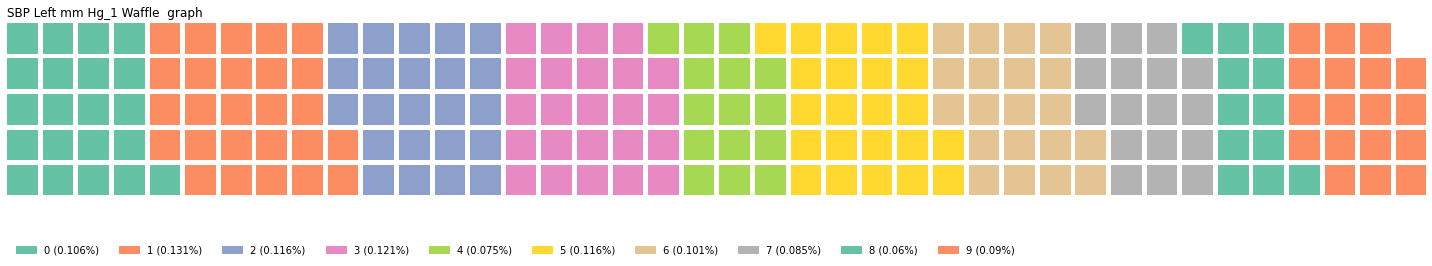

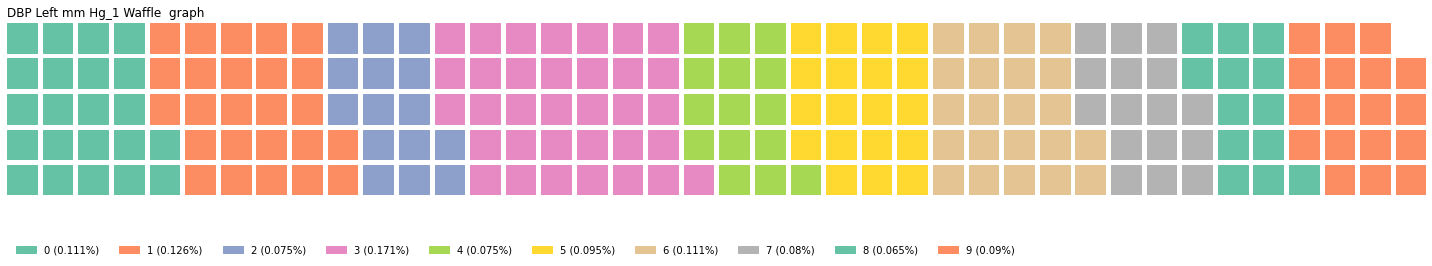

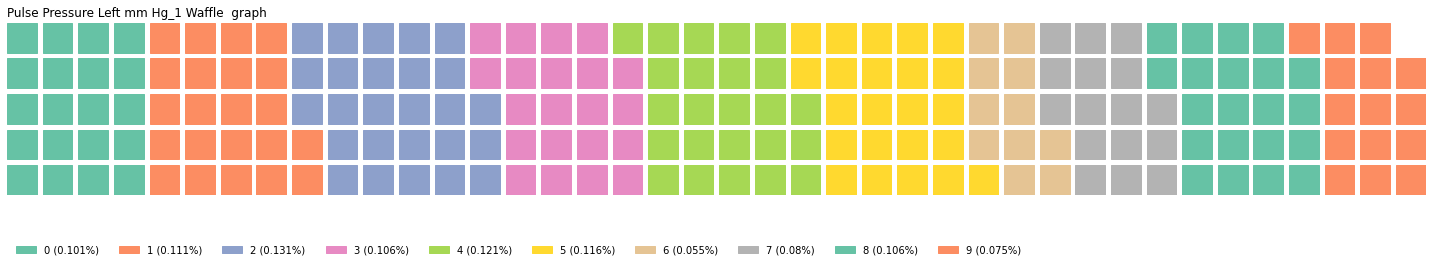

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

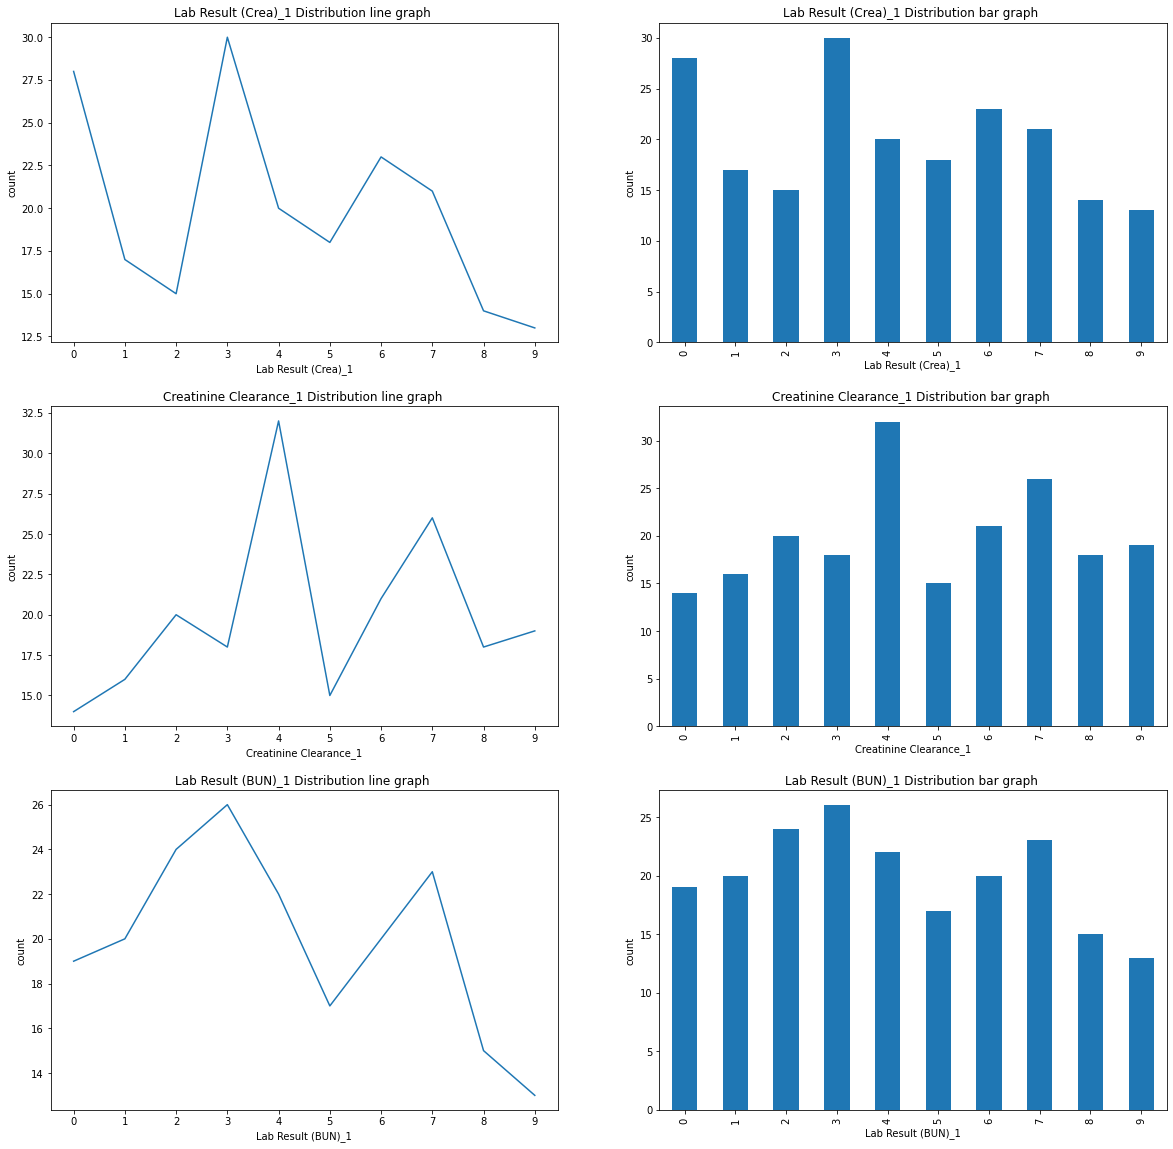

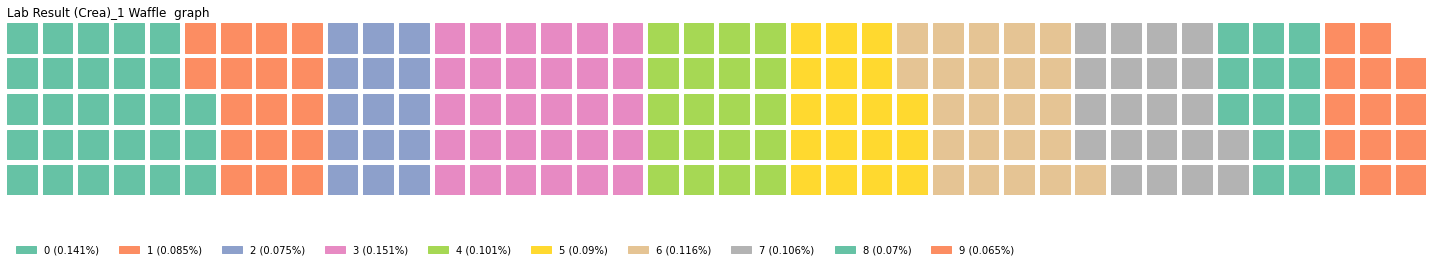

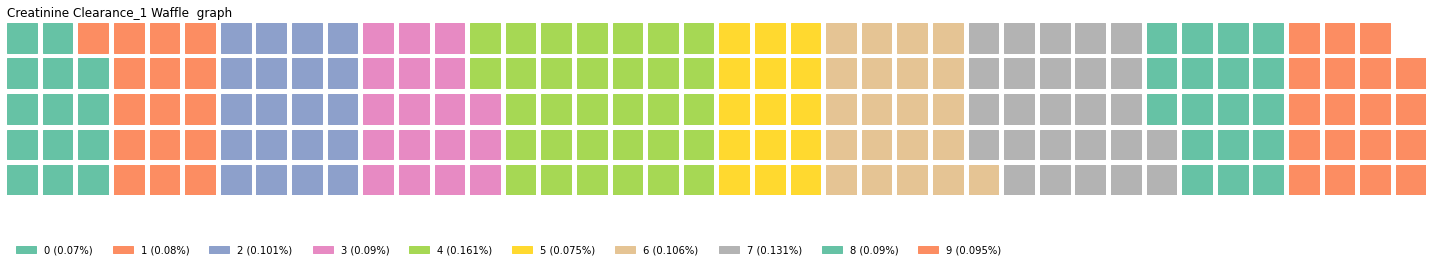

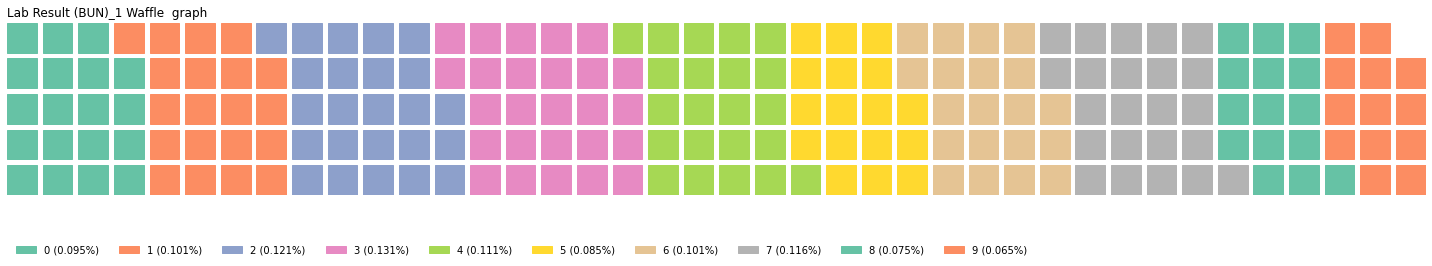

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

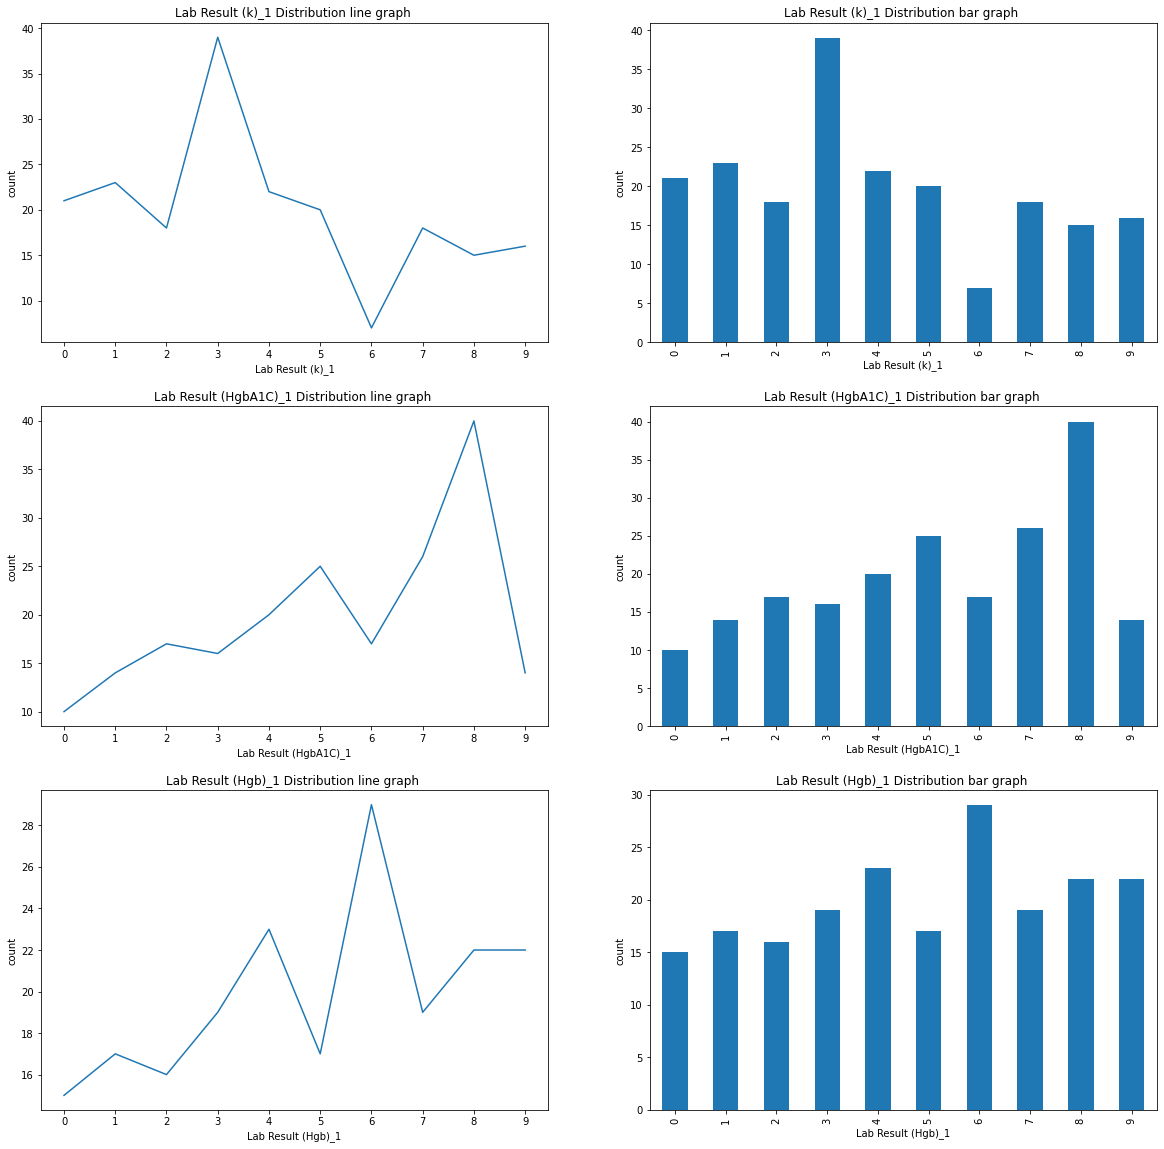

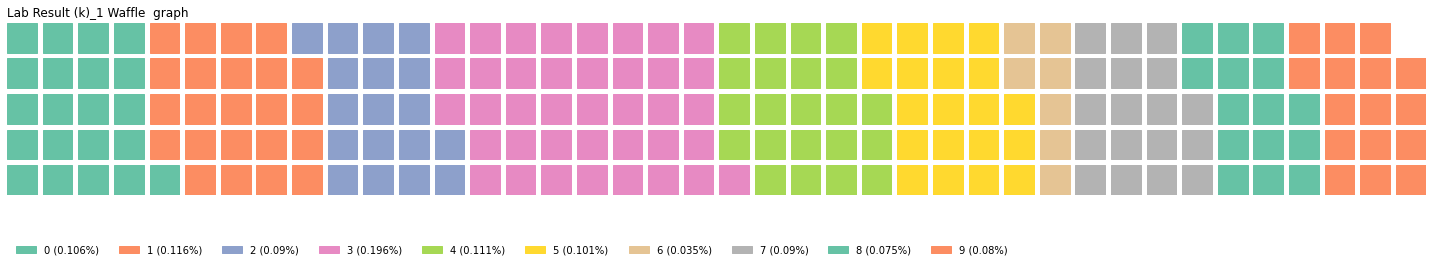

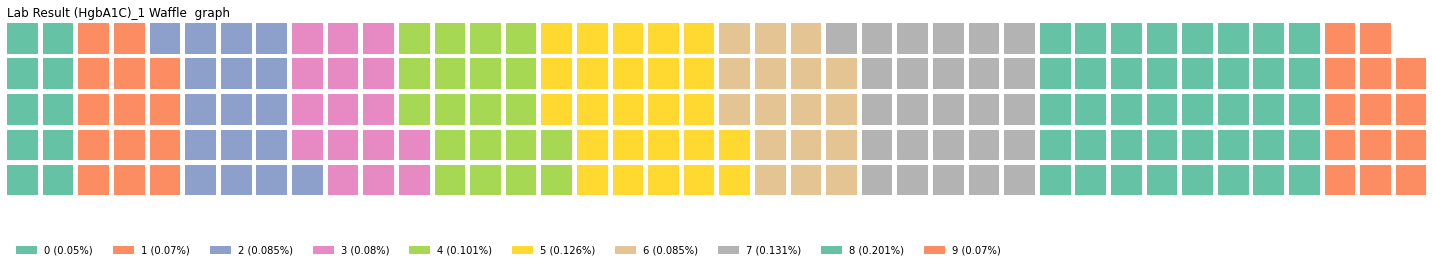

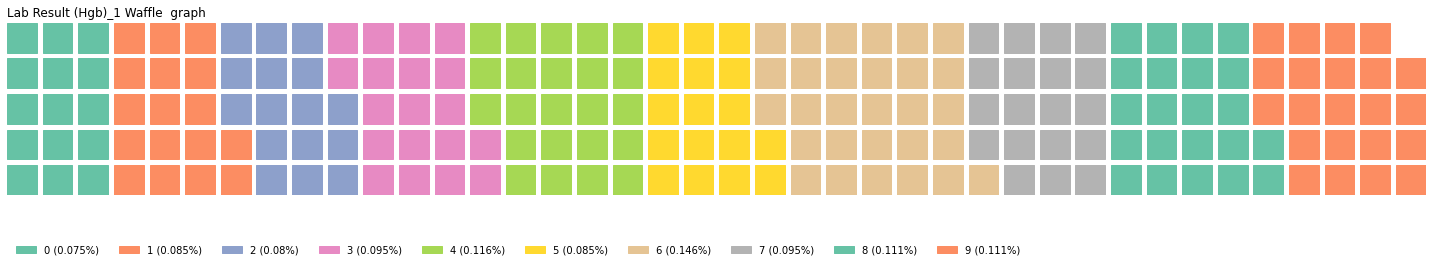

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

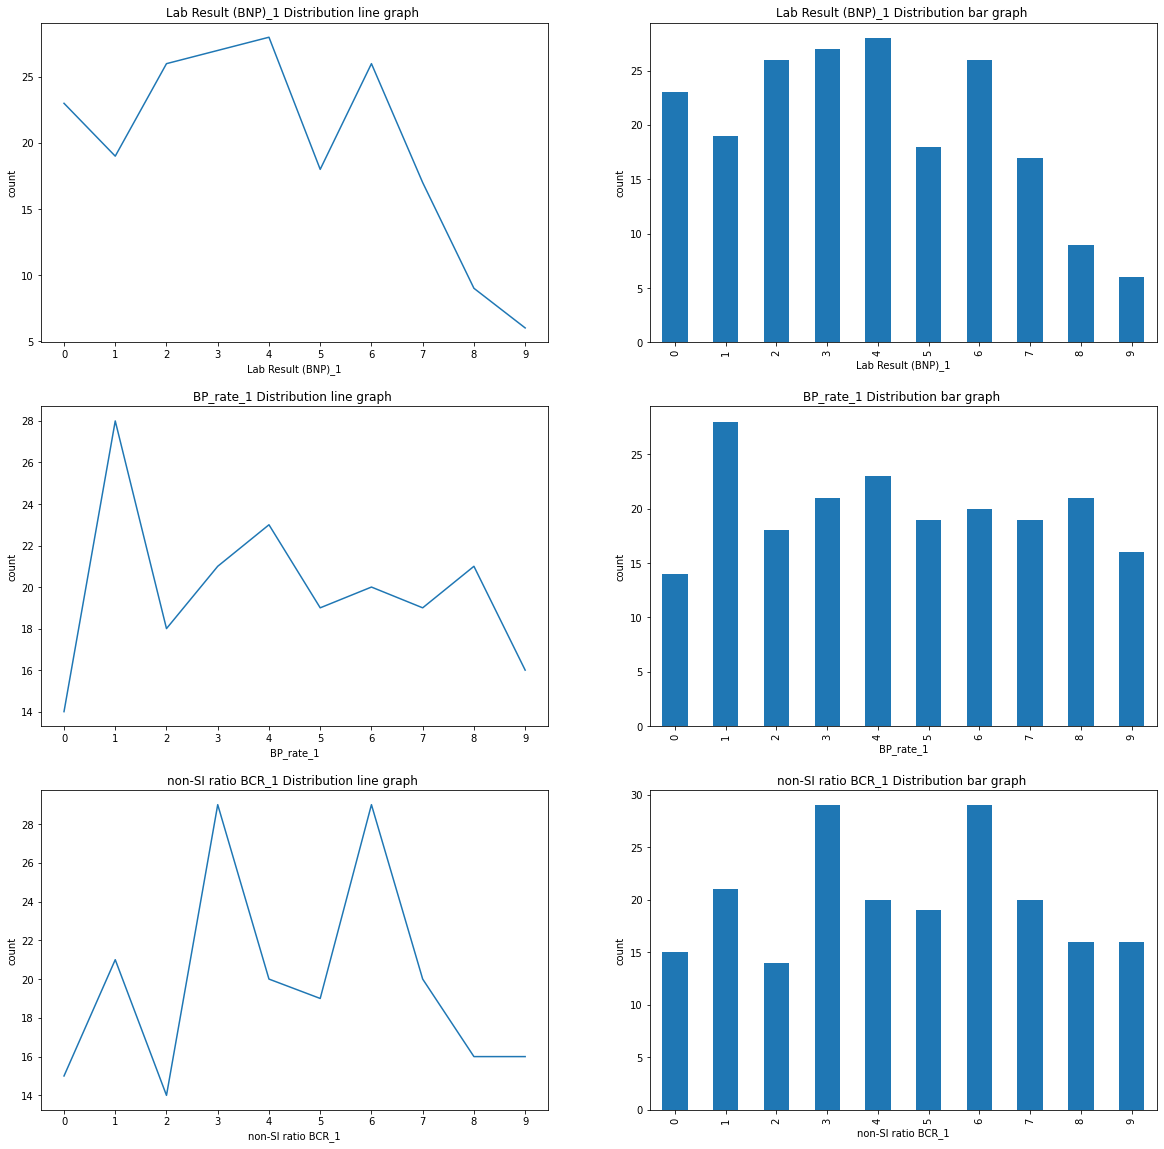

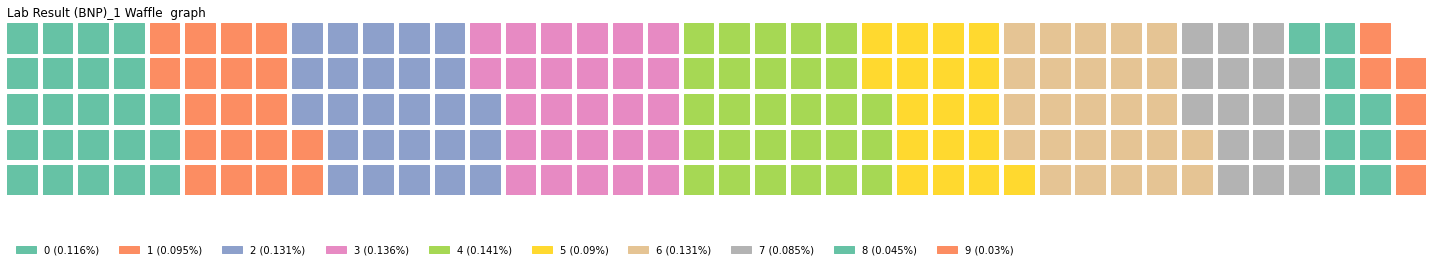

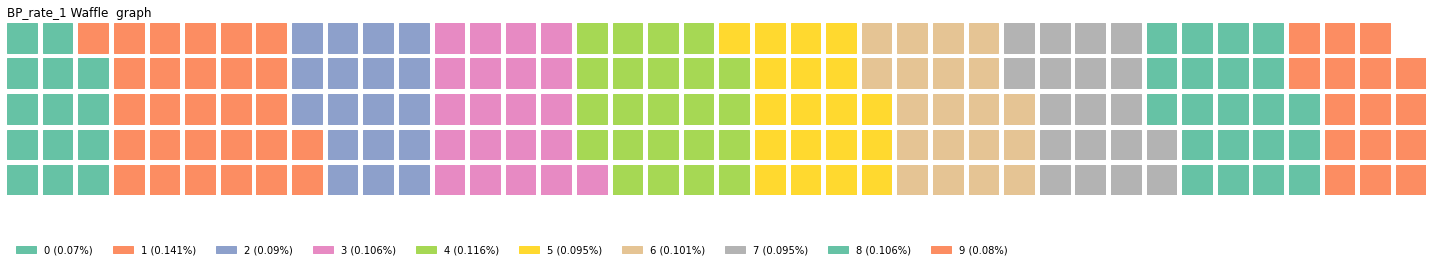

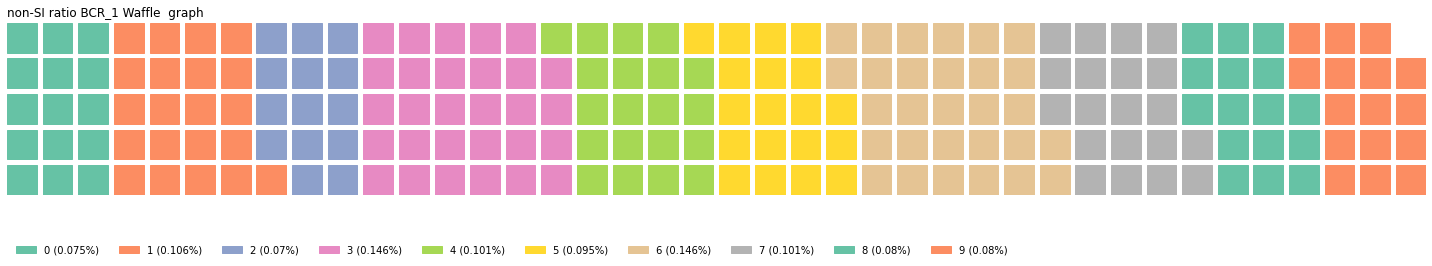

In [ ]:


key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
indexer = indexer + 1 

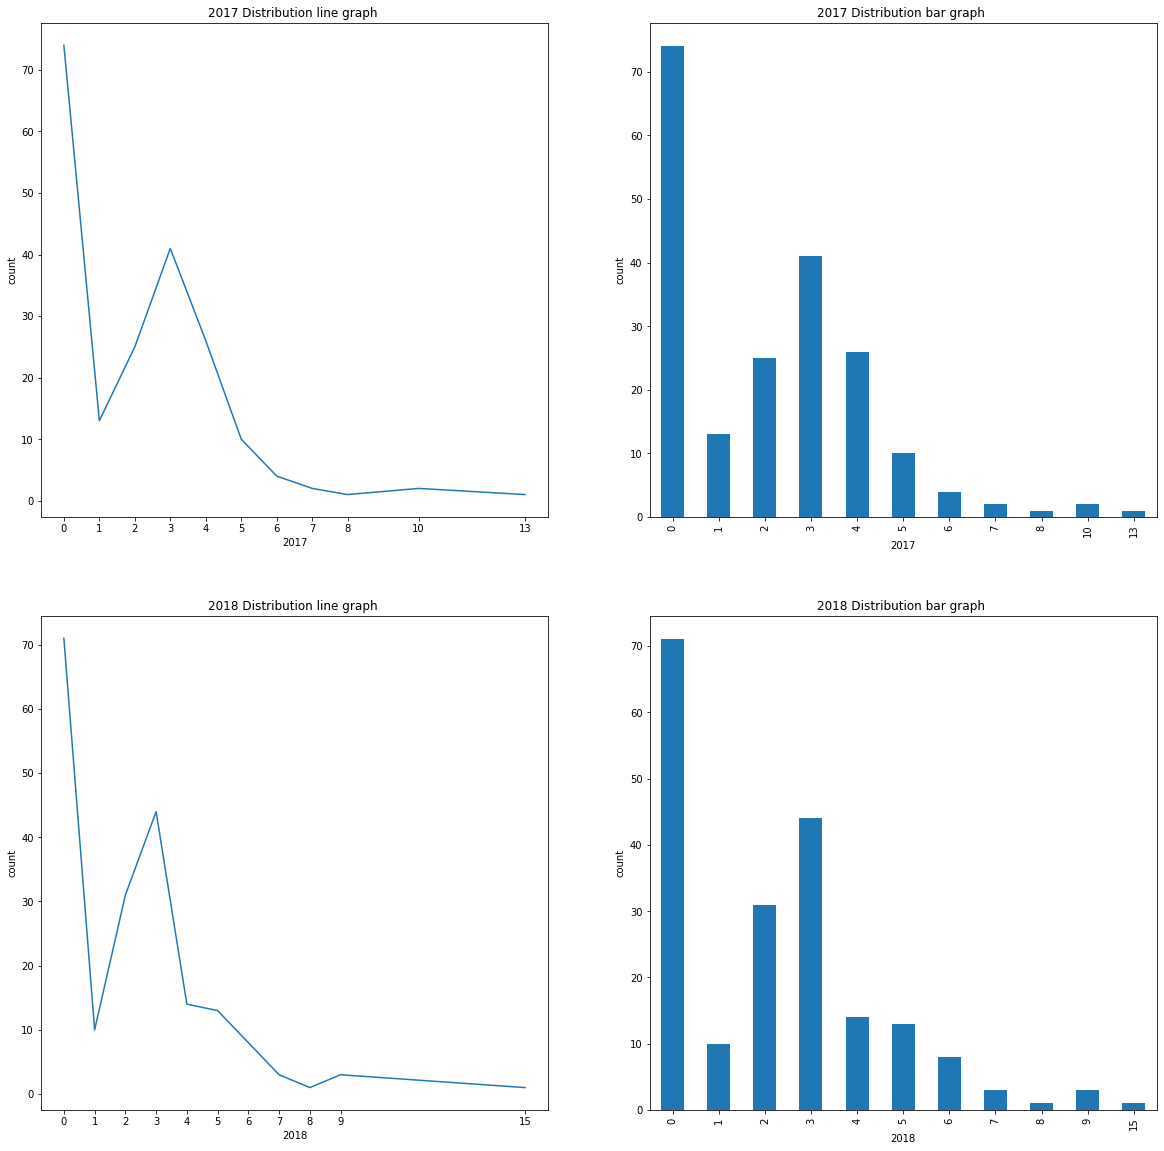

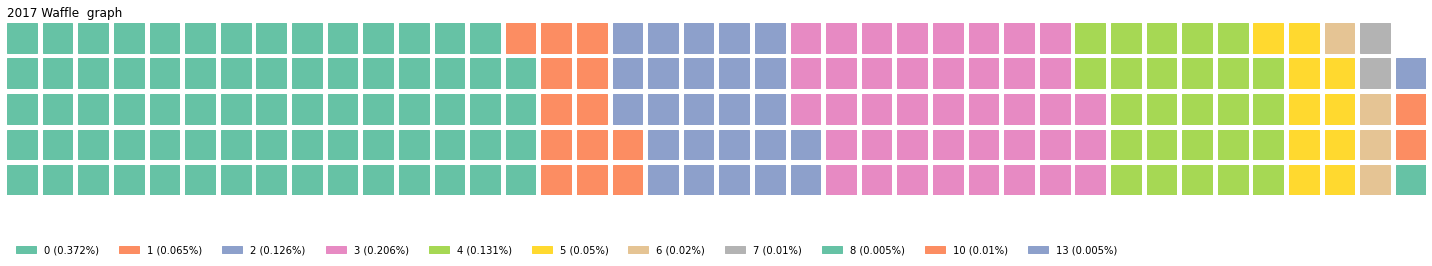

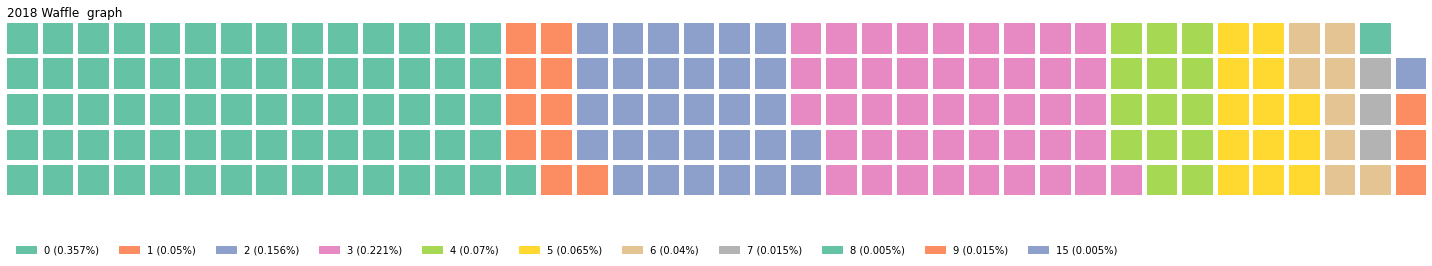

In [ ]:

START = 0
END = 3
key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 2 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

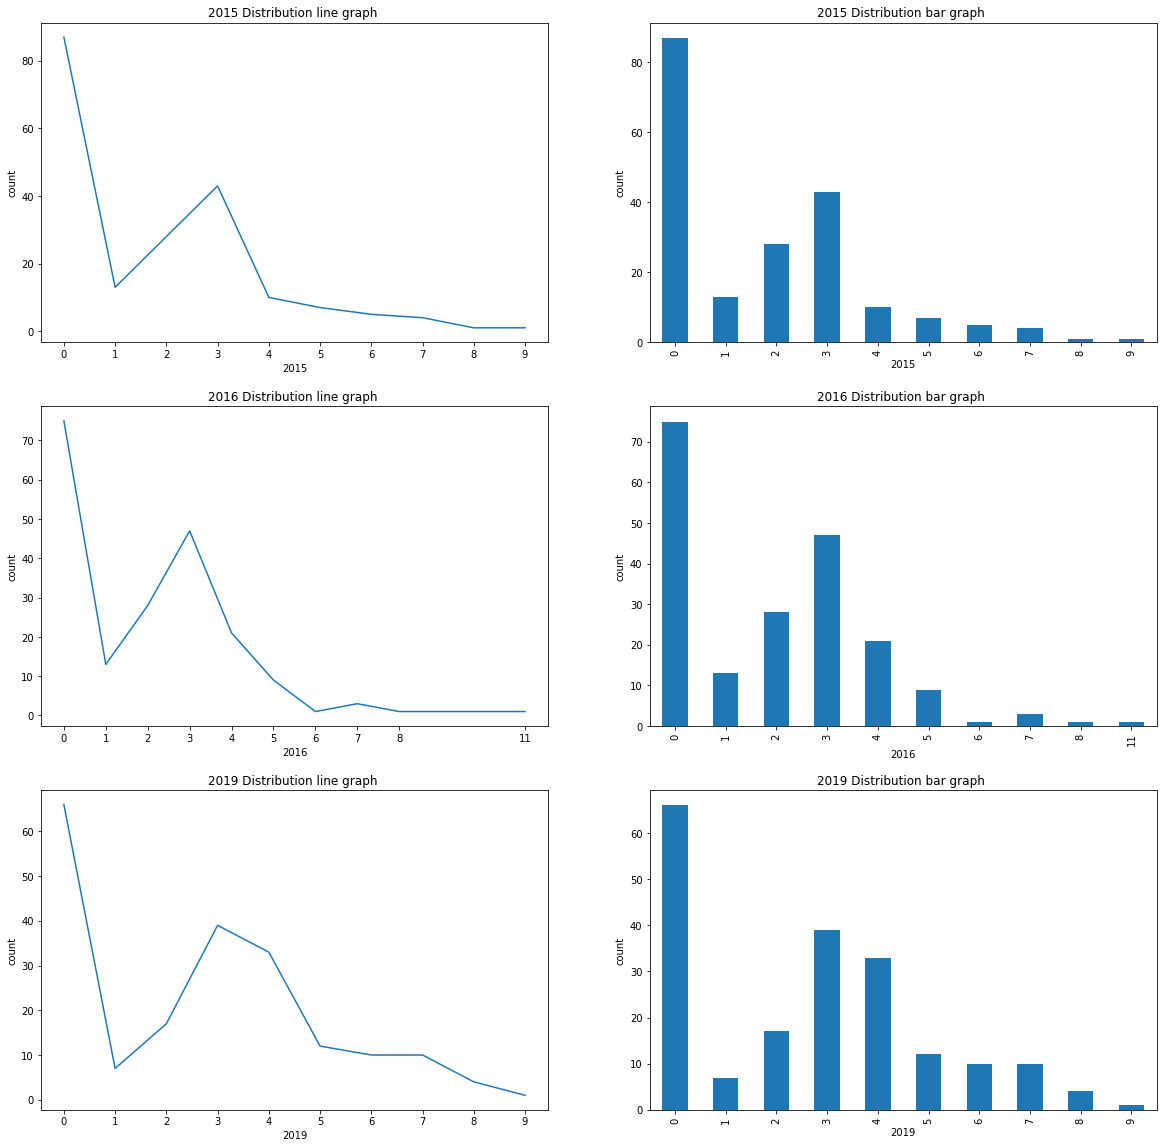

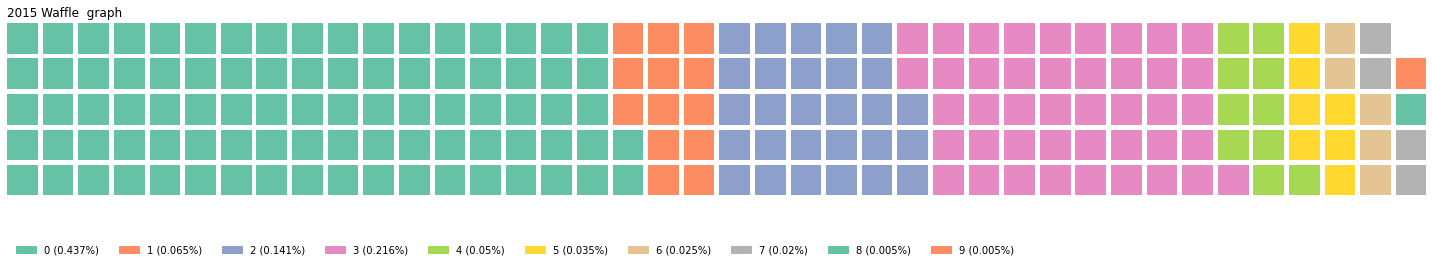

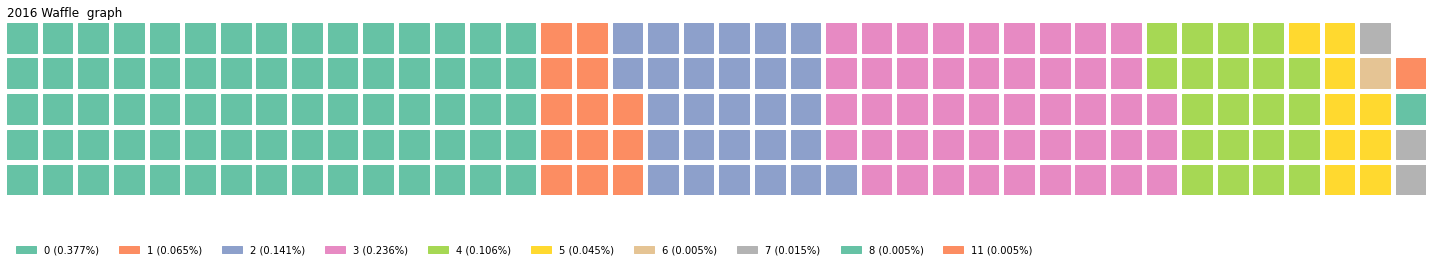

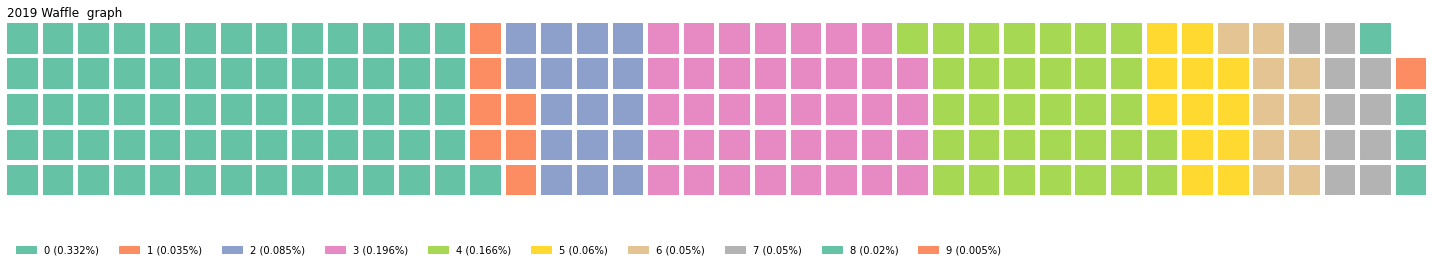

In [ ]:
START = 0
END = 3

key = list_of_keys[indexer]
fig, axes = plt.subplots(nrows= 3 , ncols=2 , figsize=(20,20))

for i, col in enumerate(values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)].index[START:END]) : 
  info_df[col].value_counts().sort_index().plot(ax =axes[i,0],xticks = info_df[col].value_counts().sort_index().keys() ,title = '{} Distribution line graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  info_df[col].value_counts().sort_index().plot(kind= 'bar' , ax =axes[i,1] ,title = '{} Distribution bar graph '.format(col)
  ,xlabel = col , ylabel = 'count')
  data = info_df[col].value_counts().sort_index().to_dict()
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=5, 
      figsize = (20,10),
      values=data, 
      title={'label': '{} Waffle  graph '.format(col), 'loc': 'left'},
      labels=["{0} ({1}%)".format(k, round((v/info_df[col].value_counts().sort_index().sum()),3)) for k, v in data.items()],
      legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
  )





plt.tight_layout()
START =   START + 3
END = END + 3 

In [ ]:
key = list_of_keys[indexer]
values_df[(values_df.Is_binary==False) &(values_df['No of Values']==key)]

,Values,No of Values,Is_binary
Optimal Medication treatment/Aggressive Risk Factors,"[1.0, 0.0, 0.5]",3,False
CVAType,"[1, 0, 2]",3,False
Smoking Detailed History,"[0, 1, 2]",3,False
JVP,"[0, 1, 2]",3,False
Lower limb edema,"[0, 3, 1]",3,False
RV1,"[0, 1, 2]",3,False
RV2,"[0, 2, 3]",3,False
Nymber of Anthology,"[1, 0, 2]",3,False
Lab_Result_2_BUN,"[2, 1, 0]",3,False
Lab_Result_2_K,"[1, 2, 0]",3,False
